# --- Analysis of HMM cross-validation results ---

Run this cell to import HMM results

In [7]:
import pickle
import matplotlib.pyplot as plt

paths = ['/cluster/gjb_lab/2472402/outputs/keras_train_CV_old/hmm_cross_val/results_%d.pkl' % i for i in range(1,8)]
results = [pickle.load(open(f, 'rb')) for f in paths]

## 1. Training loss and validation loss

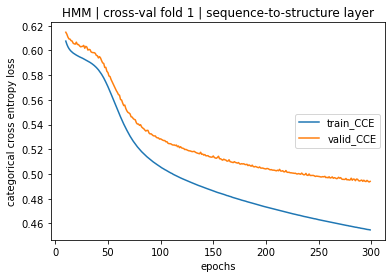

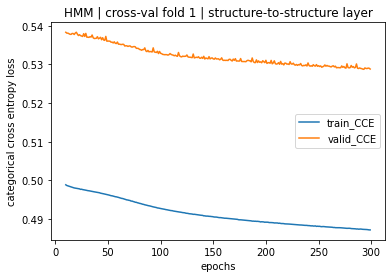

#############################################################


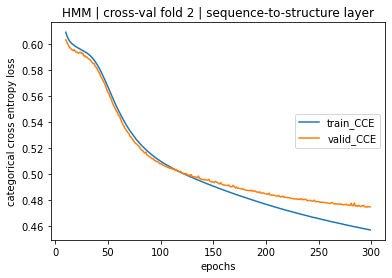

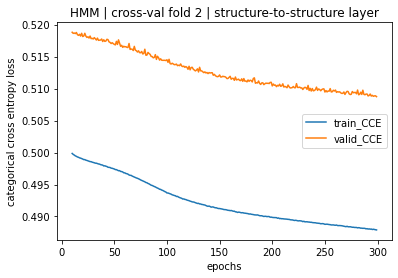

#############################################################


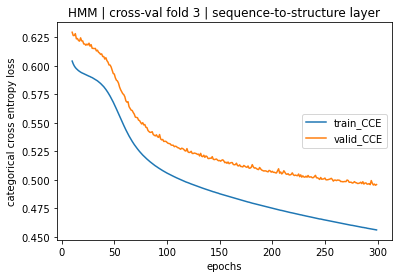

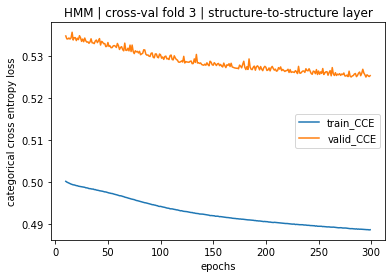

#############################################################


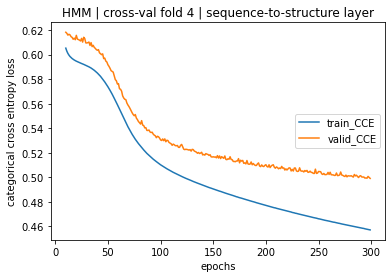

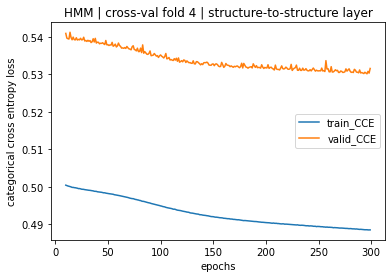

#############################################################


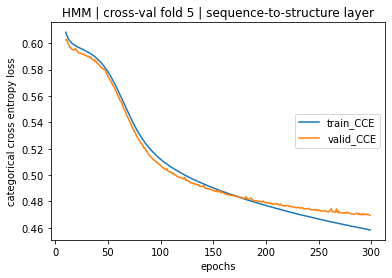

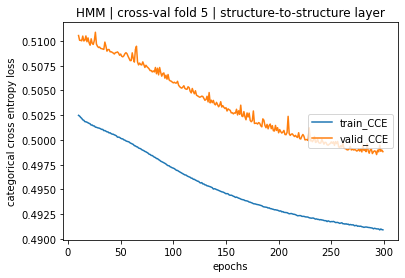

#############################################################


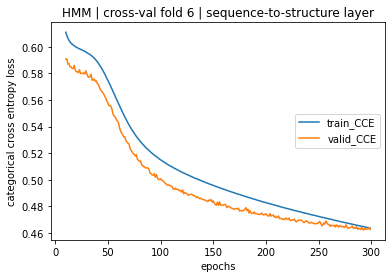

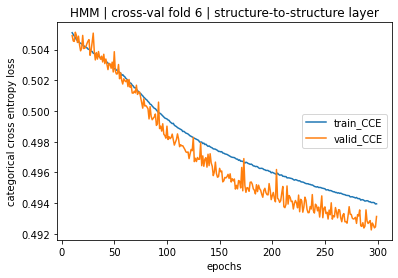

#############################################################


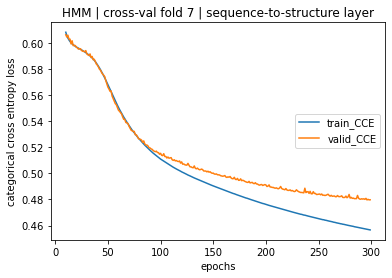

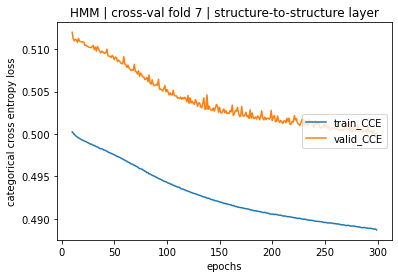

#############################################################


In [9]:
for fold, [r1,r2] in enumerate(results):
    
    fold += 1 # fold 1 to 7
     
    # drop the 10 epochs as the losses decline sharply
    r1 = r1.loc[10:,['loss','val_loss']]
    r1.columns = {'train_CCE','valid_CCE'}
    # do this to silent the text output of plot()
    null_pointer = plt.plot(r1)
    plt.title('HMM | cross-val fold %d | sequence-to-structure layer' % fold)
    plt.legend(r1, loc='center right')
    plt.xlabel('epochs')
    plt.ylabel('categorical cross entropy loss')
    plt.show()
    
    # repeat for layer 2 results
    r2 = r2.loc[10:,['loss','val_loss']]
    r2.columns = {'train_CCE','valid_CCE'}
    # do this to silent the text output of plot()
    null_pointer = plt.plot(r2)
    plt.title('HMM | cross-val fold %d | structure-to-structure layer' % fold)
    plt.legend(r2, loc='center right')
    plt.xlabel('epochs')
    plt.ylabel('categorical cross entropy loss')
    plt.show()
    
    print('#############################################################')

### Taking a closer look at HMM cross val fold 6

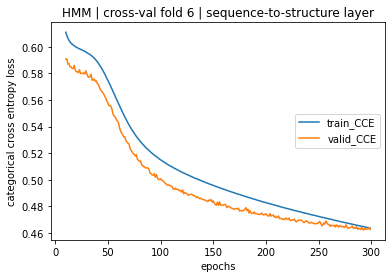

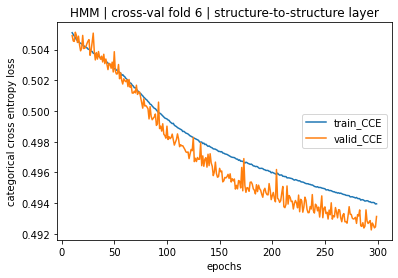

In [11]:
fold = 5 # 0-based label index 

[r1,r2] = results[fold]

fold += 1

r1 = r1.loc[10:,['loss','val_loss']]
r1.columns = {'train_CCE','valid_CCE'}
# do this to silent the text output of plot()
null_pointer = plt.plot(r1)
plt.title('HMM | cross-val fold %d | sequence-to-structure layer' % fold)
plt.legend(r1, loc='center right')
plt.xlabel('epochs')
plt.ylabel('categorical cross entropy loss')
plt.show()

r2 = r2.loc[10:,['loss','val_loss']]
r2.columns = {'train_CCE','valid_CCE'}
# do this to silent the text output of plot()
null_pointer = plt.plot(r2)
plt.title('HMM | cross-val fold %d | structure-to-structure layer' % fold)
plt.legend(r1, loc='center right')
plt.xlabel('epochs')
plt.ylabel('categorical cross entropy loss')
plt.show()

## 2. Training accuracy and validation accuracy

#### Looking at overall accuracy across all 7 folds

In [17]:
import numpy as np
r2 = np.array([r2['val_accuracy'].max() for [_,r2] in results])
print(r2)
print('Validation accuracy ± 1 sd: %.3f +/- %.3f' % (r2.mean(), r2.std()))

[0.8020637  0.80985677 0.80408192 0.80233014 0.81561863 0.81527638
 0.81311059]
Validation accuracy ± 1 sd: 0.809 +/- 0.006


#### Looking at accuracy across all folds except fold 6

In [18]:
results_copy = results.copy()
del results_copy[5] # remove fold 6 from results
r2 = np.array([r2['val_accuracy'].max() for [_,r2] in results_copy])
print(r2)
print('Validation accuracy ± 1 sd: %.3f +/- %.3f' % (r2.mean(), r2.std()))

[0.8020637  0.80985677 0.80408192 0.80233014 0.81561863 0.81311059]
Validation accuracy ± 1 sd: 0.808 +/- 0.005


# --- Analysis of PSSM cross-validation results ---

Run this code to load PSSM results

In [23]:
import pickle
import matplotlib.pyplot as plt

paths = ['/cluster/gjb_lab/2472402/outputs/pssm_cross_val/results_%d.pkl' % i for i in range(1,8)]
results = [pickle.load(open(f, 'rb')) for f in paths]

## 1. Training and validation loss

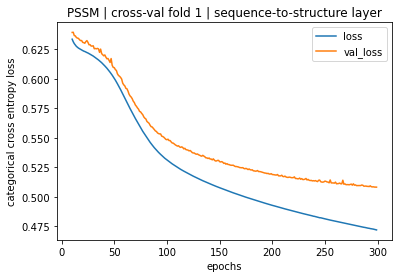

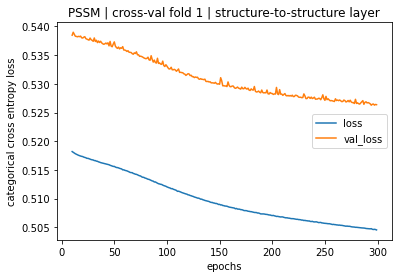

#############################################################


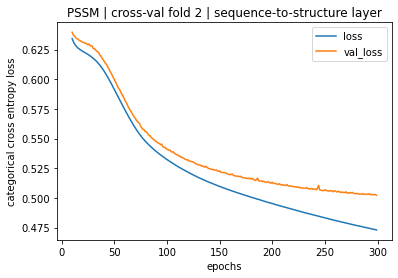

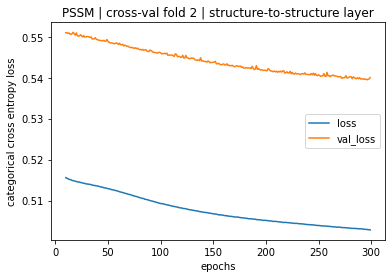

#############################################################


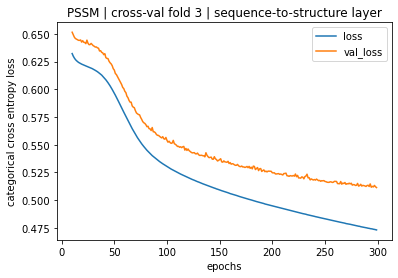

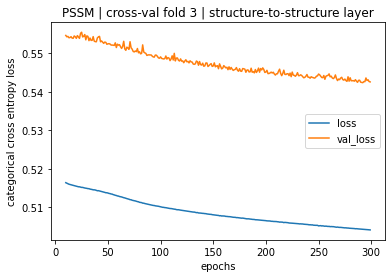

#############################################################


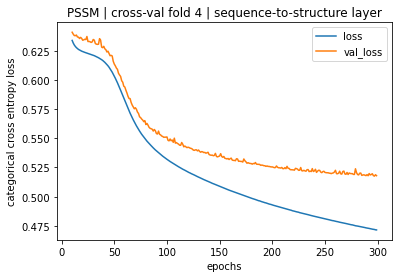

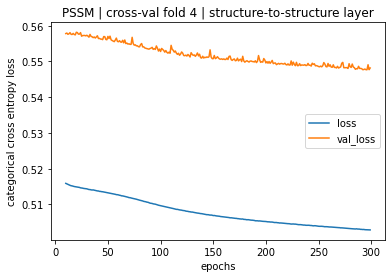

#############################################################


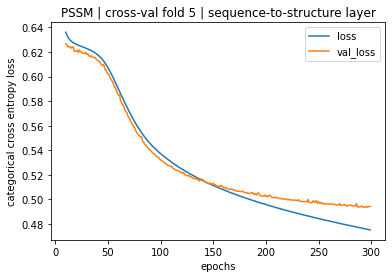

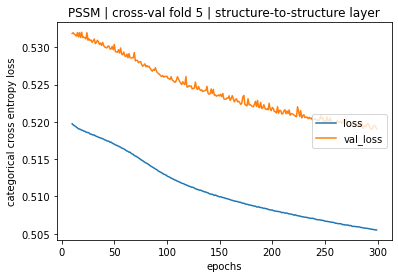

#############################################################


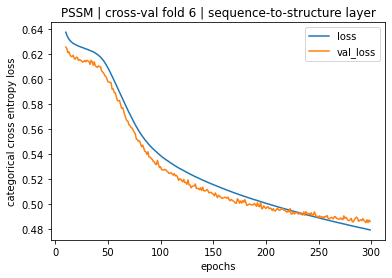

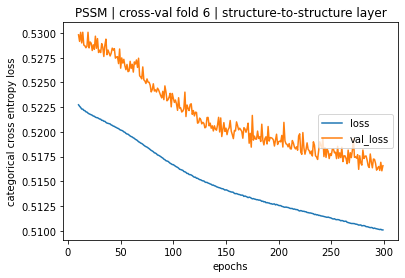

#############################################################


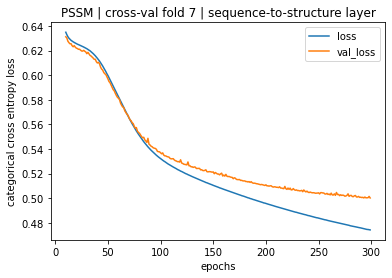

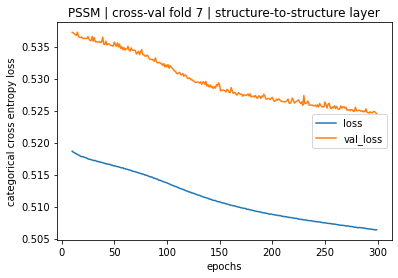

#############################################################


In [100]:
for fold, [r1,r2] in enumerate(results):
    
    fold += 1 # fold 1 to 7
     
    # drop the 10 epochs as the losses decline sharply
    r1 = r1.loc[10:,['loss','val_loss']]
    # do this to silent the text output of plot()
    null_pointer = plt.plot(r1)
    plt.title('PSSM | cross-val fold %d | sequence-to-structure layer' % fold)
    plt.legend(r1)
    plt.xlabel('epochs')
    plt.ylabel('categorical cross entropy loss')
    plt.show()
    
    # repeat for layer 2 results
    r2 = r2.loc[10:,['loss','val_loss']]
    # do this to silent the text output of plot()
    null_pointer = plt.plot(r2)
    plt.title('PSSM | cross-val fold %d | structure-to-structure layer' % fold)
    plt.legend(r2, loc = 'center right')
    plt.xlabel('epochs')
    plt.ylabel('categorical cross entropy loss')
    plt.show()
    
    print('#############################################################')

## 2. Training accuracy and validation accuracy

#### Looking at accuracy across all 7 folds

In [24]:
import numpy as np
r2 = np.array([r2['val_accuracy'].max() for [_,r2] in results])
print(r2)
print('Validation accuracy ± 1 sd: %.3f +/- %.3f' % (r2.mean(), r2.std()))

[0.80026788 0.79657388 0.79410613 0.79432231 0.8043794  0.80593824
 0.80221355]
Validation accuracy ± 1 sd: 0.800 +/- 0.004


#### Looking at accuracy across all folds except fold 6

In [25]:
results_copy = results.copy()
del results_copy[5] # remove fold 6 from results
r2 = np.array([r2['val_accuracy'].max() for [_,r2] in results_copy])
print(r2)
print('Validation accuracy ± 1 sd: %.3f +/- %.3f' % (r2.mean(), r2.std()))

[0.80026788 0.79657388 0.79410613 0.79432231 0.8043794  0.80221355]
Validation accuracy ± 1 sd: 0.799 +/- 0.004


# --- Rerun of validation set #6 ---

## HMM fold 6

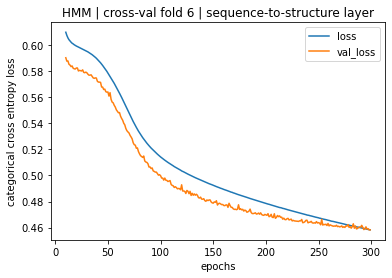

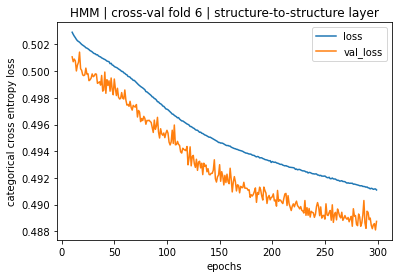

In [193]:
import pickle
import matplotlib.pyplot as plt

hmm_path = '/cluster/gjb_lab/2472402/outputs/hmm_cross_val_6/results_1.pkl'
[hmm1, hmm2] = pickle.load(open(hmm_path, 'rb'))


hmm1 = hmm1.loc[10:,['loss','val_loss']]
# do this to silent the text output of plot()
null_pointer = plt.plot(hmm1)
plt.title('HMM | cross-val fold 6 | sequence-to-structure layer')
plt.legend(hmm1)
plt.xlabel('epochs')
plt.ylabel('categorical cross entropy loss')
plt.show()

hmm2 = hmm2.loc[10:,['loss','val_loss']]
# do this to silent the text output of plot()
null_pointer = plt.plot(hmm2)
plt.title('HMM | cross-val fold 6 | structure-to-structure layer')
plt.legend(hmm2)
plt.xlabel('epochs')
plt.ylabel('categorical cross entropy loss')
plt.show()

## PSSM fold 6

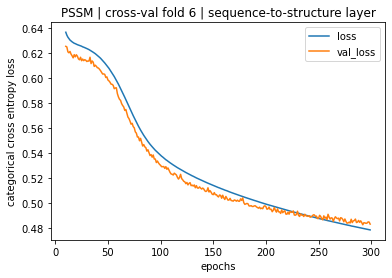

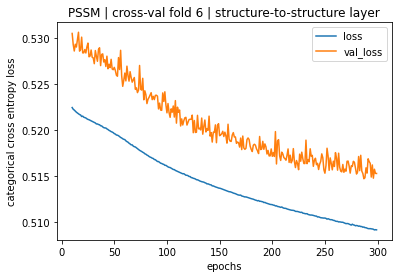

In [192]:
import pickle
import matplotlib.pyplot as plt

pssm_path = '/cluster/gjb_lab/2472402/outputs/pssm_cross_val_6/results_1.pkl'
[pssm1, pssm2] = pickle.load(open(pssm_path, 'rb'))


pssm1 = pssm1.loc[10:,['loss','val_loss']]
# do this to silent the text output of plot()
null_pointer = plt.plot(pssm1)
plt.title('PSSM | cross-val fold 6 | sequence-to-structure layer')
plt.legend(pssm1)
plt.xlabel('epochs')
plt.ylabel('categorical cross entropy loss')
plt.show()

pssm2 = pssm2.loc[10:,['loss','val_loss']]
# do this to silent the text output of plot()
null_pointer = plt.plot(pssm2)
plt.title('PSSM | cross-val fold 6 | structure-to-structure layer')
plt.legend(pssm2)
plt.xlabel('epochs')
plt.ylabel('categorical cross entropy loss')
plt.show()

#  --- Plotting SNNS training loss ---

Cross-val batch 6 looks really weird, as the validation loss (in orange) was lower than the training loss (in blue). So I decided to look at the training loss for HMM net in Alexey's training.

The directory from which I obtained the files is: /homes/adrozdetskiy/Projects/JnetDatasets/Jnet_training_output_v2/cross-val(1-7)

In [1]:
import pandas as pd
paths = ['/cluster/gjb_lab/2472402/data/hmm_%d.txt' % n for n in range(1,8)]
dfs = [pd.read_csv(path, sep = ',', names = ['cycle','SSE','MSE']) for path in paths]
df1 = [df.loc[0:38].set_index('cycle') for df in dfs]
df2 = [df.loc[39:76].set_index('cycle') for df in dfs]

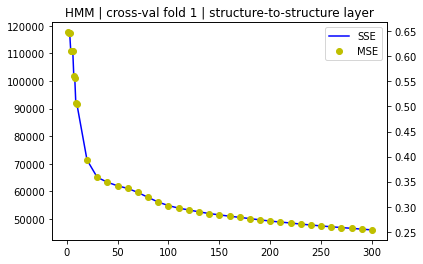

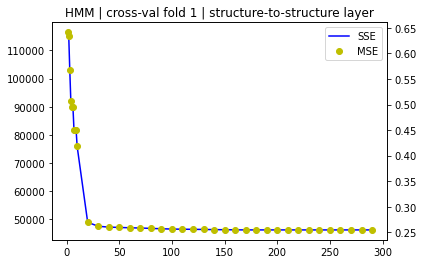

#############################################################


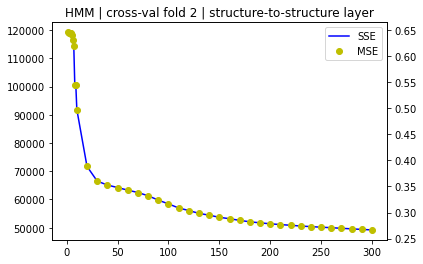

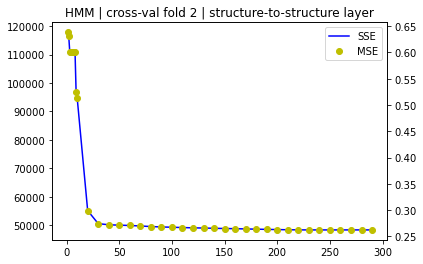

#############################################################


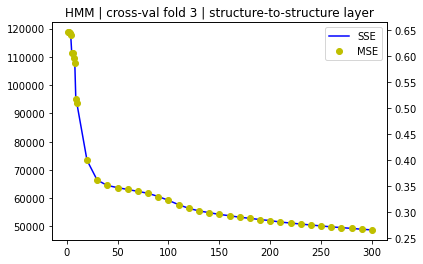

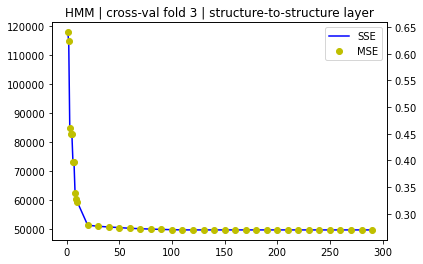

#############################################################


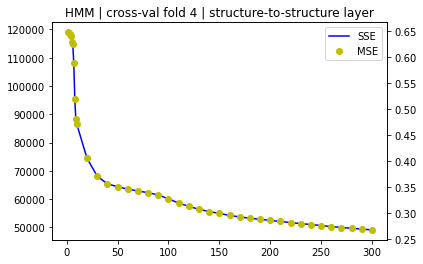

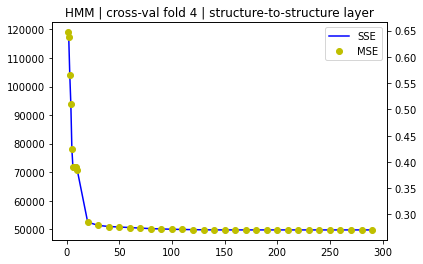

#############################################################


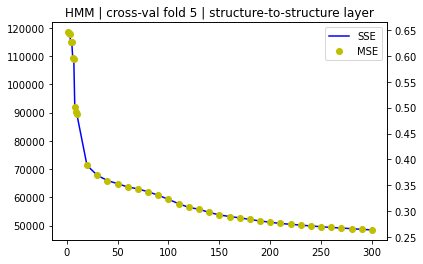

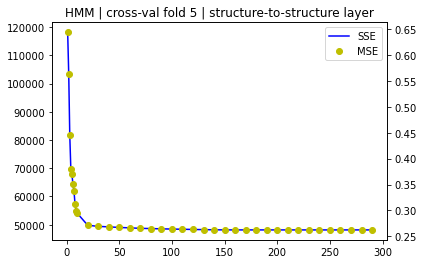

#############################################################


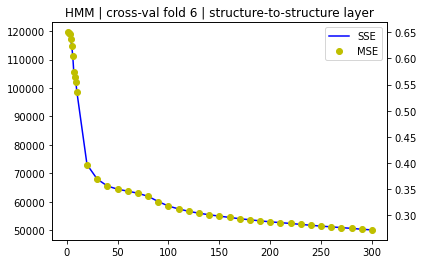

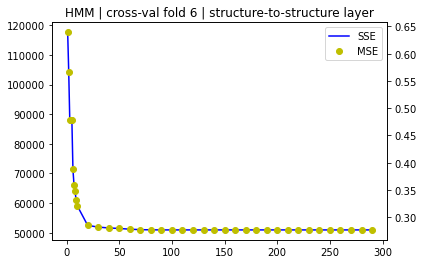

#############################################################


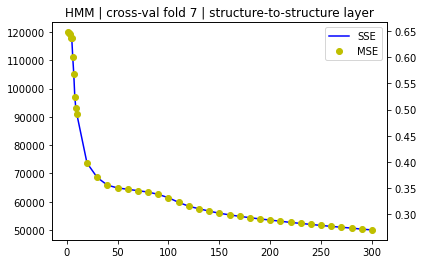

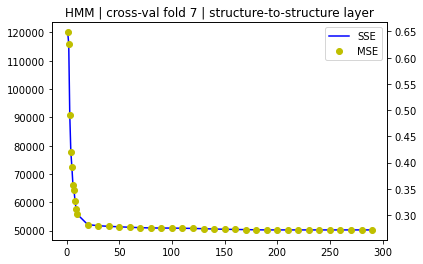

#############################################################


In [95]:
import matplotlib.pyplot as plt

for fold, (idf1, idf2) in enumerate(zip(df1, df2)):
    fold += 1
    
    # plot sequence to structure layer
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    sse ,= ax1.plot(idf1.SSE[:], 'b-', label='SSE')
    mse ,= ax2.plot(idf1.MSE[:], 'yo', label='MSE')
    plt.legend([sse,mse],['SSE', 'MSE'])
    plt.title('HMM | cross-val fold %d | structure-to-structure layer' % fold)
    plt.show()
    
    # plot structure to structure layer
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    sse ,= ax1.plot(idf2.SSE[:], 'b-', label='SSE')
    mse ,= ax2.plot(idf2.MSE[:], 'yo', label='MSE')
    plt.legend([sse,mse],['SSE', 'MSE'])
    plt.title('HMM | cross-val fold %d | structure-to-structure layer' % fold)
    plt.show()
    
    print('#############################################################')

Unfortunately there was no data on validation loss, seems to have been turned off. I am exploring re-running the train_network script to obtain output on performance against the validation sets in each of the 7 folds

# --- Rerun of SNNS but including validation loss ---

## HMM

### Cross validation fold 6 (the problematic one)

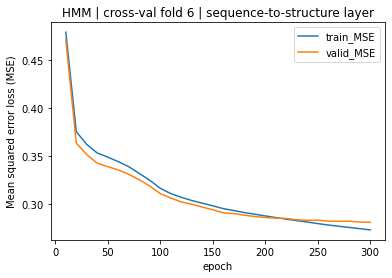

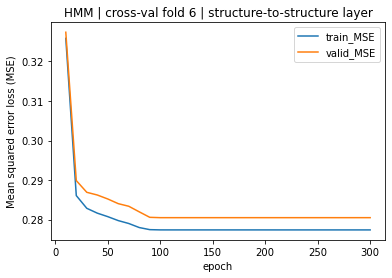

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

cross_val_fold = 6
profiletype = 'HMM'
layer = 'sequence'
path = '/cluster/gjb_lab/2472402/outputs/jpred_train/hmm%d-1.csv' % cross_val_fold
start = 10

## plot 1
data = pd.read_csv(path, sep=',', names=['train_SSE','train_MSE','valid_SSE','valid_MSE'])
MSE = data.loc[start:, ['train_MSE','valid_MSE']]
null = plt.plot(MSE)
null = plt.legend(MSE)
null = plt.ylabel('Mean squared error loss (MSE)')
null = plt.xlabel('epoch')
null = plt.title('%s | cross-val fold %d | %s-to-structure layer' % (profiletype, cross_val_fold, layer))
plt.show()

## plot 2
layer = 'structure'
path = '/cluster/gjb_lab/2472402/outputs/jpred_train/hmm%d-2.csv' % cross_val_fold
data = pd.read_csv(path, sep=',', names=['train_SSE','train_MSE','valid_SSE','valid_MSE'])
MSE = data.loc[start:, ['train_MSE','valid_MSE']]
null = plt.plot(MSE)
null = plt.legend(MSE)
null = plt.ylabel('Mean squared error loss (MSE)')
null = plt.xlabel('epoch')
null = plt.title('%s | cross-val fold %d | %s-to-structure layer' % (profiletype, cross_val_fold, layer))
plt.show()

See that the problem where valid MSE is lower than train MSE also appears here. Only comparing MSE and not SSE because SSE depends on the number of examples

### Control: repeat on cross validation fold 1

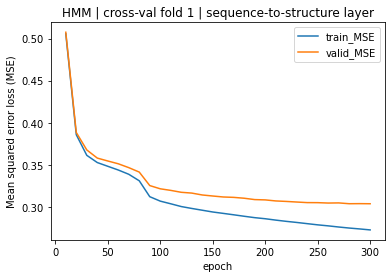

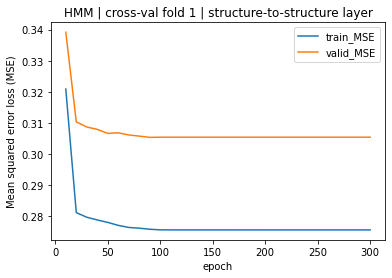

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

cross_val_fold = 1
profiletype = 'HMM'
layer = 'sequence'
path = '/cluster/gjb_lab/2472402/outputs/jpred_train/hmm%d-1.csv' % cross_val_fold
start = 10

### plot 1
data = pd.read_csv(path, sep=',', names=['train_SSE','train_MSE','valid_SSE','valid_MSE'])
MSE = data.loc[start:, ['train_MSE','valid_MSE']]
null = plt.plot(MSE)
null = plt.legend(MSE)
null = plt.ylabel('Mean squared error loss (MSE)')
null = plt.xlabel('epoch')
null = plt.title('%s | cross-val fold %d | %s-to-structure layer' % (profiletype, cross_val_fold, layer))
plt.show()

### plot 2
layer = 'structure'
path = '/cluster/gjb_lab/2472402/outputs/jpred_train/hmm%d-2.csv' % cross_val_fold
data = pd.read_csv(path, sep=',', names=['train_SSE','train_MSE','valid_SSE','valid_MSE'])
MSE = data.loc[start:, ['train_MSE','valid_MSE']]
null = plt.plot(MSE)
null = plt.legend(MSE)
null = plt.ylabel('Mean squared error loss (MSE)')
null = plt.xlabel('epoch')
null = plt.title('%s | cross-val fold %d | %s-to-structure layer' % (profiletype, cross_val_fold, layer))
plt.show()

# --- Measuring secondary structure content ---

## Training set

Read in 8-state DSSP frequency tables which I generated using dssp.sh, in turn obtained from DSSP_OUT folder in Alexey's JnetDatasets folder

In [6]:
import os
import pandas as pd
dssp_paths = ['/cluster/gjb_lab/2472402/data/dssp/cv%d-val-dssps.txt' % i for i in range(1,8)]
assert all([os.path.exists(p) for p in dssp_paths])
col_names = ['ID','B','E','G','H','I','S','T','-']
dssps = [pd.read_csv(p,delimiter=' ', names=col_names).set_index('ID',inplace=False) for p in dssp_paths]

In [7]:
dssps[5].head()

,B,E,G,H,I,S,T,-
ID,,,,,,,,
d1a12a_,6,170,16,5,0,56,55,93
d1a62a1,1,0,0,28,0,2,8,8
d1a9xa1,3,10,3,74,0,14,18,31
d1acoa1,10,46,18,52,0,15,32,53
d1b25a2,1,63,0,50,0,17,37,42


In [8]:
[df.shape for df in dssps]

[(192, 8), (192, 8), (192, 8), (192, 8), (192, 8), (192, 8), (191, 8)]

Function to convert 8-state DSSP to 3-state DSSP

In [11]:
def convert_dssp(df_in):
    df_out = pd.DataFrame()
    df_out['H'] = df_in.H
    df_out['E'] = df_in.E + df_in.B
    df_out['-'] = df_in.loc[:,['G','I','S','T','-']].sum(axis=1)
    return df_out # return as df

def get_content(df_in):
    s1 = df_in.sum(axis=0)
    s2 = s1.sum()
    return s1/s2 * 100 # as a named series

df = convert_dssp(dssps[5])
print(df.head())
print()
print(get_content(df))

          H    E    -
ID                   
d1a12a_   5  176  220
d1a62a1  28    1   18
d1a9xa1  74   13   66
d1acoa1  52   56  118
d1b25a2  50   64   96

H    38.276395
E    20.662217
-    41.061388
dtype: float64


Repeat for all validation sets

In [30]:
res_prop.Helix.max() - res_prop.Helix.min()

5.680071288970744

In [31]:
res_prop.Sheet.max() - res_prop.Sheet.min()

4.397277330248787

In [32]:
res_prop.Coil.max() - res_prop.Coil.min()

1.487836609414373

In [37]:
pd.options.display.float_format = "{:,.2f}".format

l = []
for df in dssps:
    df1 = convert_dssp(df)
    s = get_content(df1)
    l.append(s)

res_prop = pd.concat(l,axis=1).T
#res_prop.index = range(1,8)
res_prop = pd.concat([pd.Series(range(1,8),name='Fold'),res_prop],axis=1)
res_prop.columns = ['Fold','Helix','Sheet','Coil']
diff_row = {
    'Fold':'▲',
    'Helix':res_prop.Helix.max() - res_prop.Helix.min(),
    'Sheet':res_prop.Sheet.max() - res_prop.Sheet.min(),
    'Coil':res_prop.Coil.max() - res_prop.Coil.min()
}


print('Proportions')
res_prop.append(diff_row,ignore_index=True)

Proportions


,Fold,Helix,Sheet,Coil
0,1,37.19,20.46,42.35
1,2,34.85,23.13,42.01
2,3,32.60,24.85,42.55
3,4,35.01,22.77,42.22
4,5,35.94,22.78,41.28
5,6,38.28,20.66,41.06
6,7,36.69,21.33,41.98
7,▲,5.68,4.40,1.49


In [306]:
res_prop.describe()

,H,E,-
count,7.000000,7.000000,7.000000
mean,0.357939,0.222836,0.419225
std,0.018549,0.015641,0.005523
min,0.325963,0.204572,0.410614
25%,0.349341,0.209976,0.416304
50%,0.359397,0.227667,0.420135
75%,0.369383,0.229559,0.422863
max,0.382764,0.248545,0.425492


In [304]:
def get_content(df_in):
    s1 = df_in.sum(axis=0)
    # s2 = s1.sum()
    return s1 # as a named series

# same as above but no conversion to percentage
l = []
for df in dssps:
    df1 = convert_dssp(df)
    s = get_content(df1)
    l.append(s)

res_freq = pd.concat(l,axis=1).T
res_freq.index = range(1,8)
print('Frequency')
res_freq

Frequency


,H,E,-
1,12218,6721,13915
2,10417,6914,12557
3,9966,7599,13009
4,10669,6937,12864
5,11128,7053,12782
6,11641,6284,12488
7,10740,6245,12289


In [305]:
res_freq.describe()

,H,E,-
count,7.000000,7.000000,7.000000
mean,10968.428571,6821.857143,12843.428571
std,762.672681,467.502737,531.607266
min,9966.000000,6245.000000,12289.000000
25%,10543.000000,6502.500000,12522.500000
50%,10740.000000,6914.000000,12782.000000
75%,11384.500000,6995.000000,12936.500000
max,12218.000000,7599.000000,13915.000000


## Blind test set

Want to make sure that the contents are similar in the blind test set as each of the cross validation subsets, about 37% H 21% E 42% Coil

In [289]:
import os
import pandas as pd
p = '/cluster/gjb_lab/2472402/data/dssp/blind-dssps.txt'
col_names = ['ID','B','E','G','H','I','S','T','-']
blind = pd.read_csv(p, delimiter=' ', names=col_names).set_index('ID',inplace=False)
blind.head()

,B,E,G,H,I,S,T,-
ID,,,,,,,,
d1a1xa_,0,51,0,4,0,9,13,29
d1bgfa_,2,0,6,92,0,4,6,14
d1chda_,7,47,6,57,0,16,33,32
d1cola_,0,0,6,149,0,3,12,27
d1crua_,5,153,16,10,0,57,77,130


Reduce 8-state to 3 state DSSP

In [290]:
def convert_dssp(df_in):
    df_out = pd.DataFrame()
    df_out['H'] = df_in.H
    df_out['E'] = df_in.E + df_in.B
    df_out['-'] = df_in.loc[:,['G','I','S','T','-']].sum(axis=1)
    return df_out # return as df

def get_content(df_in):
    s1 = df_in.sum(axis=0)
    s2 = s1.sum()
    return s1/s2 # as a named series

df = convert_dssp(blind)
df.head()

,H,E,-
ID,,,
d1a1xa_,4,51,51
d1bgfa_,92,2,30
d1chda_,57,54,87
d1cola_,149,0,48
d1crua_,10,158,280


Calculate SS content

In [288]:
b = pd.DataFrame(get_content(df)).T
b

,H,E,-
0,0.355911,0.224978,0.419111


# --- Training with MSE loss instead of crossentropy ---

Look at fold 6 only

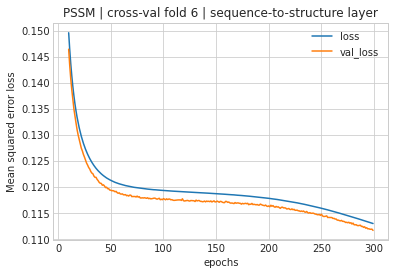

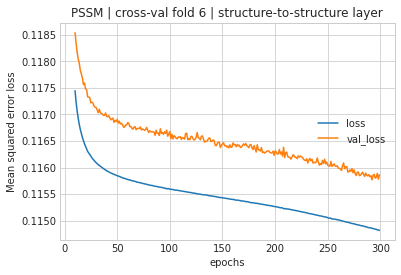

#############################################################


In [93]:
import pickle
import matplotlib.pyplot as plt

paths = ['/cluster/gjb_lab/2472402/outputs/pssm_cross_val_mse/results_%d.pkl' % i for i in range(1,2)]
results = [pickle.load(open(f, 'rb')) for f in paths]

for fold, [r1,r2] in enumerate(results):
    
    # fold += 1 # fold 1 to 7
    fold = 6
     
    # drop the 10 epochs as the losses decline sharply
    r1 = r1.loc[10:,['loss','val_loss']]
    # do this to silent the text output of plot()
    null_pointer = plt.plot(r1)
    plt.title('PSSM | cross-val fold %d | sequence-to-structure layer' % fold)
    plt.legend(r1)
    plt.xlabel('epochs')
    plt.ylabel('Mean squared error loss')
    plt.show()
    
    # repeat for layer 2 results
    r2 = r2.loc[10:,['loss','val_loss']]
    # do this to silent the text output of plot()
    null_pointer = plt.plot(r2)
    plt.title('PSSM | cross-val fold %d | structure-to-structure layer' % fold)
    plt.legend(r2, loc = 'center right')
    plt.xlabel('epochs')
    plt.ylabel('Mean squared error loss')
    plt.show()
    
    print('#############################################################')

## HMM - 7-fold cross validation with MSE

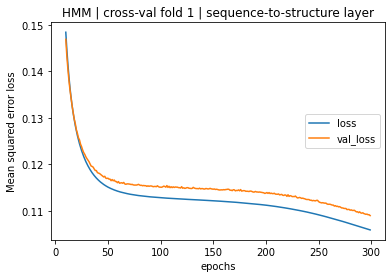

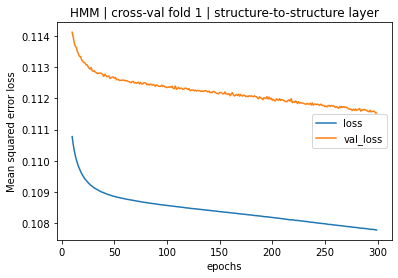

#############################################################


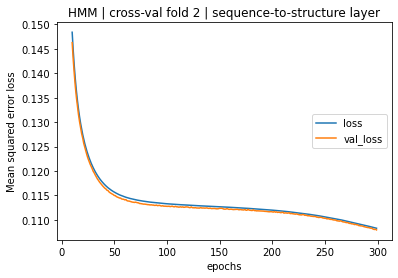

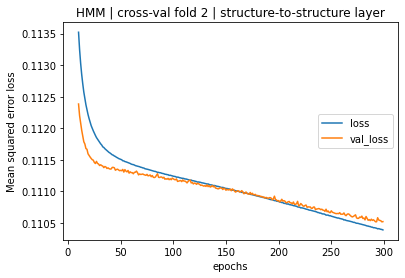

#############################################################


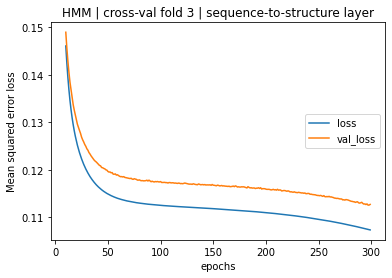

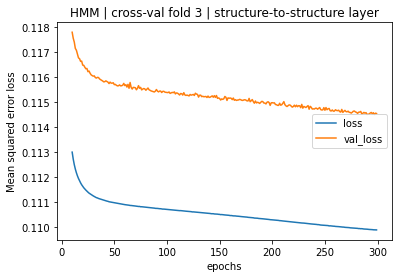

#############################################################


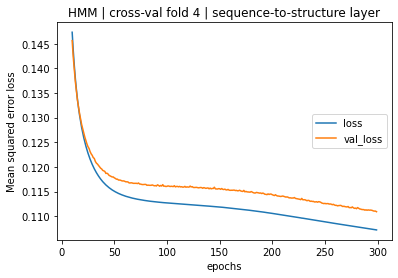

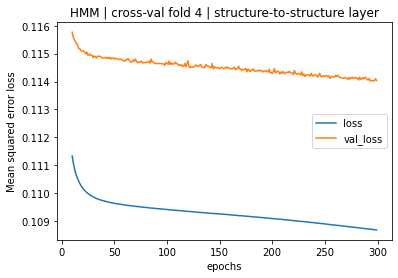

#############################################################


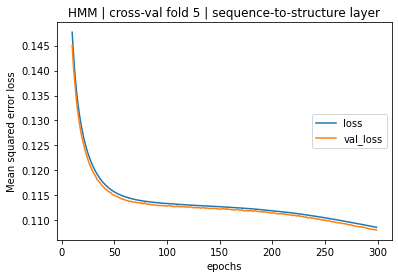

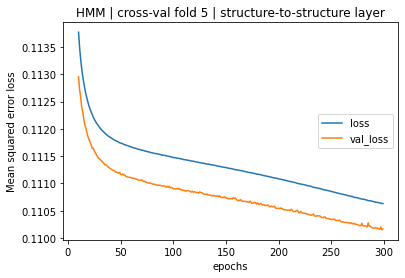

#############################################################


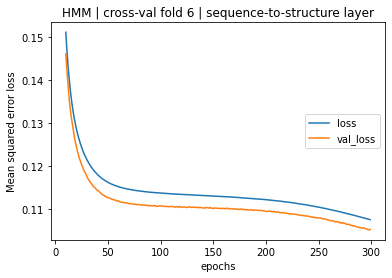

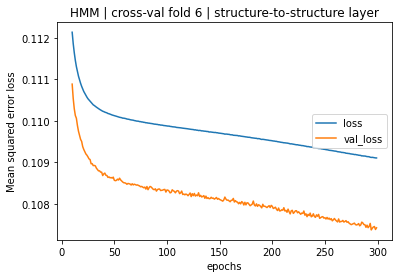

#############################################################


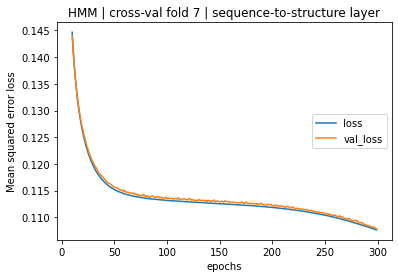

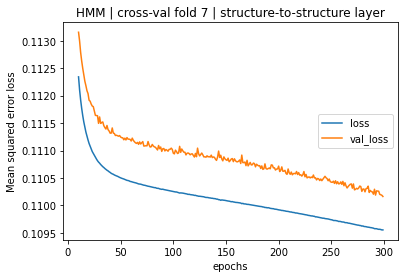

#############################################################


In [4]:
import pickle
import matplotlib.pyplot as plt

hmm_paths = ['/cluster/gjb_lab/2472402/outputs/keras_train_CV_old/hmm_cross_val_mse/results_%d.pkl' % i for i in range(1,8)]
results = [pickle.load(open(hmm_path, 'rb')) for hmm_path in hmm_paths]


for fold, [r1,r2] in enumerate(results):
    
    fold += 1 # fold 1 to 7
     
    # drop the 10 epochs as the losses decline sharply
    r1 = r1.loc[10:,['loss','val_loss']]
    # do this to silent the text output of plot()
    null_pointer = plt.plot(r1)
    plt.title('HMM | cross-val fold %d | sequence-to-structure layer' % fold)
    plt.legend(r1, loc='center right')
    plt.xlabel('epochs')
    plt.ylabel('Mean squared error loss')
    plt.show()
    
    # repeat for layer 2 results
    r2 = r2.loc[10:,['loss','val_loss']]
    # do this to silent the text output of plot()
    null_pointer = plt.plot(r2)
    plt.title('HMM | cross-val fold %d | structure-to-structure layer' % fold)
    plt.legend(r2, loc='center right')
    plt.xlabel('epochs')
    plt.ylabel('Mean squared error loss')
    plt.show()
    
    print('#############################################################')

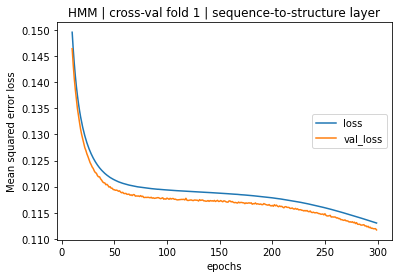

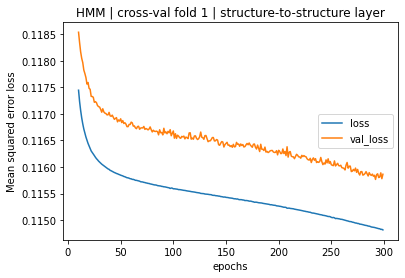

#############################################################


In [3]:
import pickle
import matplotlib.pyplot as plt

hmm_paths = ['/cluster/gjb_lab/2472402/outputs/keras_train_CV_old/pssm_cross_val_mse/results_%d.pkl' % i for i in range(1,2)]
results = [pickle.load(open(hmm_path, 'rb')) for hmm_path in hmm_paths]


for fold, [r1,r2] in enumerate(results):
    
    fold += 1 # fold 1 to 7
     
    # drop the 10 epochs as the losses decline sharply
    r1 = r1.loc[10:,['loss','val_loss']]
    # do this to silent the text output of plot()
    null_pointer = plt.plot(r1)
    plt.title('HMM | cross-val fold %d | sequence-to-structure layer' % fold)
    plt.legend(r1, loc='center right')
    plt.xlabel('epochs')
    plt.ylabel('Mean squared error loss')
    plt.show()
    
    # repeat for layer 2 results
    r2 = r2.loc[10:,['loss','val_loss']]
    # do this to silent the text output of plot()
    null_pointer = plt.plot(r2)
    plt.title('HMM | cross-val fold %d | structure-to-structure layer' % fold)
    plt.legend(r2, loc='center right')
    plt.xlabel('epochs')
    plt.ylabel('Mean squared error loss')
    plt.show()
    
    print('#############################################################')

There are issues with fold 2, 5, 6 - validation loss is lower than training loss. 
Maybe MSE is not a good loss function to pair with sigmoid-softmax activation functions.

## PSSM - 7-fold cross validation with MSE

# Visualising accuracy scores

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [52]:
wd='/cluster/gjb_lab/2472402/outputs/hmm_cross_val/Q3/layer2/'
fps=[os.path.join(wd, basename) for basename in os.listdir(wd)]
dfs=[pd.read_csv(fp).set_index('seqID') for fp in fps]

for i,df in enumerate(dfs):
    y = df.Q3_accuracy
    print('\nValidation accuracy for HMM cross-validation fold %d' % (i+1))
    print('Mean ± sd: %.3f ± %.2f' % (y.mean(), y.std()))
    # print('Median: %.3f' % y.median())


Validation accuracy for HMM cross-validation fold 1
Mean ± sd: 0.803 ± 0.08

Validation accuracy for HMM cross-validation fold 2
Mean ± sd: 0.806 ± 0.08

Validation accuracy for HMM cross-validation fold 3
Mean ± sd: 0.816 ± 0.08

Validation accuracy for HMM cross-validation fold 4
Mean ± sd: 0.802 ± 0.08

Validation accuracy for HMM cross-validation fold 5
Mean ± sd: 0.810 ± 0.08

Validation accuracy for HMM cross-validation fold 6
Mean ± sd: 0.811 ± 0.08

Validation accuracy for HMM cross-validation fold 7
Mean ± sd: 0.819 ± 0.08


HMM cross validation fold 1



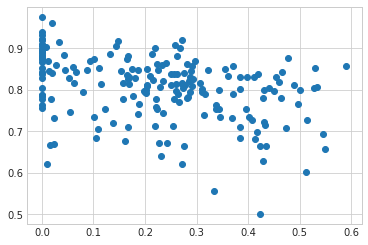

HMM cross validation fold 2



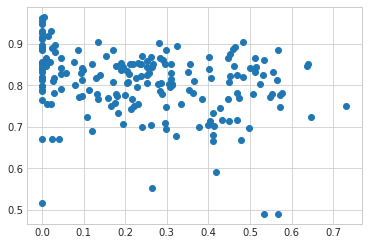

HMM cross validation fold 3



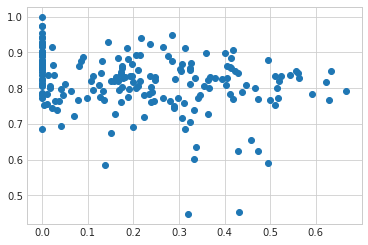

HMM cross validation fold 4



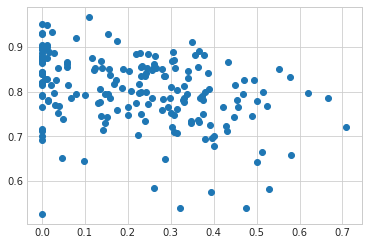

HMM cross validation fold 5



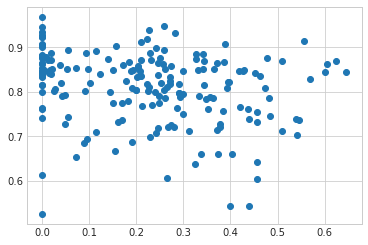

HMM cross validation fold 6



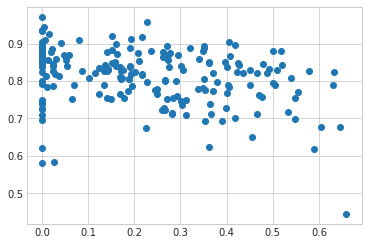

HMM cross validation fold 7



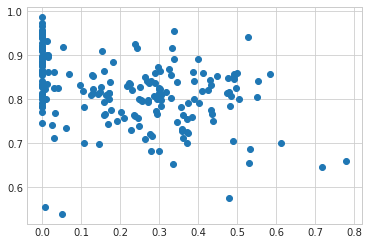

In [34]:
plt.style.use('seaborn-whitegrid')
for i,df in enumerate(dfs[:]):
    print('HMM cross validation fold %d\n' % (i+1))
    x=df.E_content
    y=df.Q3_accuracy
    plt.scatter(x, y, marker='o')
    plt.show()

In [53]:
wd='/cluster/gjb_lab/2472402/outputs/hmm_cross_val/Q3/layer1/'
fps=[os.path.join(wd, basename) for basename in os.listdir(wd)]
dfs=[pd.read_csv(fp).set_index('seqID') for fp in fps]
for i,df in enumerate(dfs):
    y = df.Q3_accuracy
    print('\nValidation accuracy for HMM cross-validation fold %d' % (i+1))
    print('Mean ± sd: %.3f ± %.2f' % (y.mean(), y.std()))
    # print('Median: %.3f' % y.median())


Validation accuracy for HMM cross-validation fold 1
Mean ± sd: 0.808 ± 0.07

Validation accuracy for HMM cross-validation fold 2
Mean ± sd: 0.800 ± 0.08

Validation accuracy for HMM cross-validation fold 3
Mean ± sd: 0.802 ± 0.08

Validation accuracy for HMM cross-validation fold 4
Mean ± sd: 0.803 ± 0.08

Validation accuracy for HMM cross-validation fold 5
Mean ± sd: 0.814 ± 0.08

Validation accuracy for HMM cross-validation fold 6
Mean ± sd: 0.806 ± 0.08

Validation accuracy for HMM cross-validation fold 7
Mean ± sd: 0.817 ± 0.08


In [54]:
wd='/cluster/gjb_lab/2472402/outputs/pssm_cross_val/Q3/layer2/'
fps=[os.path.join(wd, basename) for basename in os.listdir(wd)]
dfs=[pd.read_csv(fp).set_index('seqID') for fp in fps]
for i,df in enumerate(dfs):
    y = df.Q3_accuracy
    print('\nValidation accuracy for PSSM cross-validation fold %d' % (i+1))
    print('Mean ± sd: %.3f ± %.2f' % (y.mean(), y.std()))
    # print('Median: %.3f' % y.median())


Validation accuracy for PSSM cross-validation fold 1
Mean ± sd: 0.804 ± 0.07

Validation accuracy for PSSM cross-validation fold 2
Mean ± sd: 0.803 ± 0.09

Validation accuracy for PSSM cross-validation fold 3
Mean ± sd: 0.795 ± 0.08

Validation accuracy for PSSM cross-validation fold 4
Mean ± sd: 0.798 ± 0.08

Validation accuracy for PSSM cross-validation fold 5
Mean ± sd: 0.793 ± 0.08

Validation accuracy for PSSM cross-validation fold 6
Mean ± sd: 0.807 ± 0.09

Validation accuracy for PSSM cross-validation fold 7
Mean ± sd: 0.794 ± 0.08


In [55]:
wd='/cluster/gjb_lab/2472402/outputs/pssm_cross_val/Q3/layer1/'
fps=[os.path.join(wd, basename) for basename in os.listdir(wd)]
dfs=[pd.read_csv(fp).set_index('seqID') for fp in fps]
for i,df in enumerate(dfs):
    y = df.Q3_accuracy
    print('\nValidation accuracy for PSSM cross-validation fold %d' % (i+1))
    print('Mean ± sd: %.3f ± %.2f' % (y.mean(), y.std()))
    # print('Median: %.3f' % y.median())


Validation accuracy for PSSM cross-validation fold 1
Mean ± sd: 0.791 ± 0.08

Validation accuracy for PSSM cross-validation fold 2
Mean ± sd: 0.800 ± 0.09

Validation accuracy for PSSM cross-validation fold 3
Mean ± sd: 0.792 ± 0.08

Validation accuracy for PSSM cross-validation fold 4
Mean ± sd: 0.792 ± 0.08

Validation accuracy for PSSM cross-validation fold 5
Mean ± sd: 0.795 ± 0.08

Validation accuracy for PSSM cross-validation fold 6
Mean ± sd: 0.799 ± 0.07

Validation accuracy for PSSM cross-validation fold 7
Mean ± sd: 0.805 ± 0.09


## Validation accuracy of keras training (average across domain)

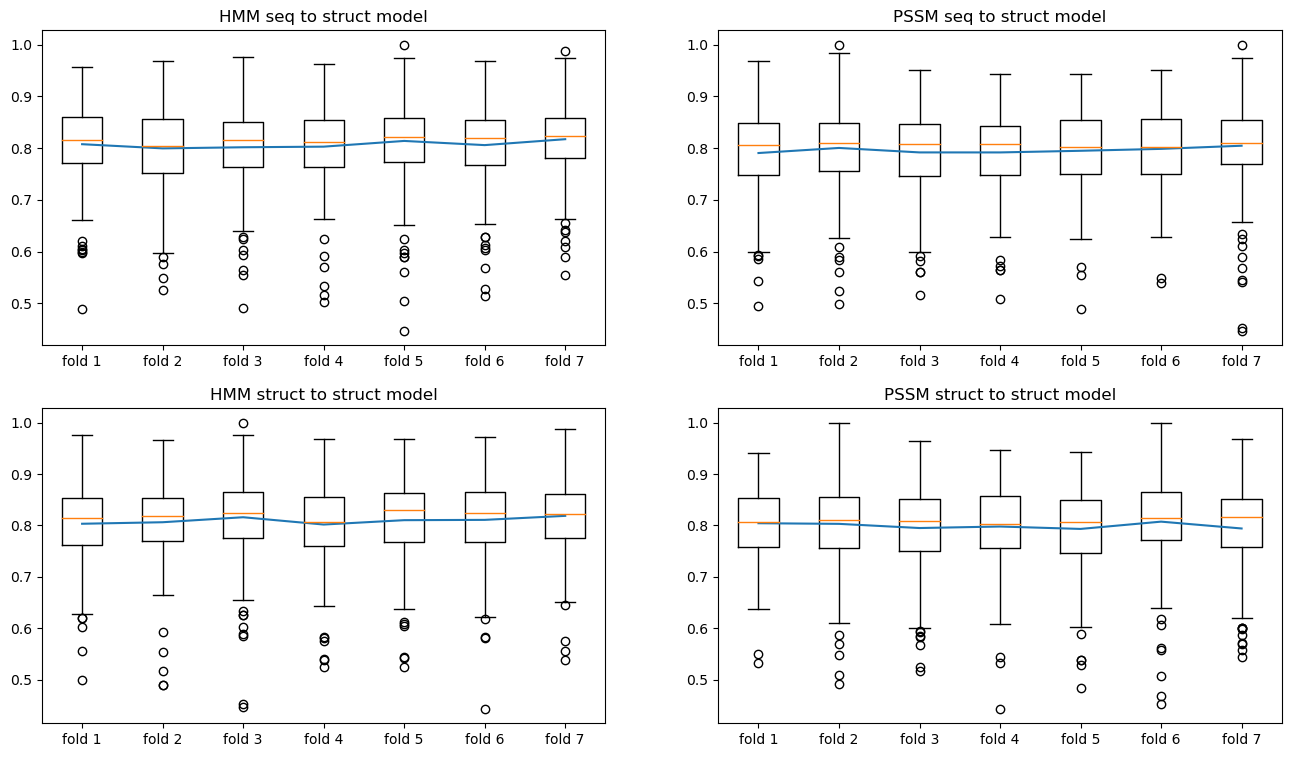

In [181]:
plt.style.use('default')
hmm1='/cluster/gjb_lab/2472402/outputs/hmm_cross_val/Q3/layer1/'
hmm2='/cluster/gjb_lab/2472402/outputs/hmm_cross_val/Q3/layer2/'
pssm1='/cluster/gjb_lab/2472402/outputs/pssm_cross_val/Q3/layer1/'
pssm2='/cluster/gjb_lab/2472402/outputs/pssm_cross_val/Q3/layer2/'

fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2,figsize=(16,9))

wd,ax,title=hmm1,ax1,'HMM seq to struct model'

fps=[os.path.join(wd, basename) for basename in os.listdir(wd)]
dfs=[pd.read_csv(fp).set_index('seqID') for fp in fps]
y=[df.Q3_accuracy for df in dfs]
positions=list(range(1,8))
labels=['fold %d' % p for p in positions]
ax.boxplot(y,labels=labels)
ax.plot(positions,[df.Q3_accuracy.mean() for df in dfs])
ax.title.set_text(title)
del wd,fps,dfs,y,positions,labels,ax

wd,ax,title=hmm2,ax3,'HMM struct to struct model'

fps=[os.path.join(wd, basename) for basename in os.listdir(wd)]
dfs=[pd.read_csv(fp).set_index('seqID') for fp in fps]
y=[df.Q3_accuracy for df in dfs]
positions=list(range(1,8))
labels=['fold %d' % p for p in positions]
ax.boxplot(y,labels=labels)
ax.plot(positions,[df.Q3_accuracy.mean() for df in dfs])
ax.title.set_text(title)
del wd,fps,dfs,y,positions,labels,ax


wd,ax,title=pssm1,ax2,'PSSM seq to struct model'
fps=[os.path.join(wd, basename) for basename in os.listdir(wd)]
dfs=[pd.read_csv(fp).set_index('seqID') for fp in fps]
y=[df.Q3_accuracy for df in dfs]
positions=list(range(1,8))
labels=['fold %d' % p for p in positions]
ax.boxplot(y,labels=labels)
ax.plot(positions,[df.Q3_accuracy.mean() for df in dfs])
ax.title.set_text(title)
del wd,fps,dfs,y,positions,labels,ax


wd,ax,title=pssm2,ax4,'PSSM struct to struct model'
fps=[os.path.join(wd, basename) for basename in os.listdir(wd)]
dfs=[pd.read_csv(fp).set_index('seqID') for fp in fps]
y=[df.Q3_accuracy for df in dfs]
positions=list(range(1,8))
labels=['fold %d' % p for p in positions]
ax.boxplot(y,labels=labels)
ax.plot(positions,[df.Q3_accuracy.mean() for df in dfs])
ax.title.set_text(title)
del wd,fps,dfs,y,positions,labels,ax


plt.show()

## Validation accuracy of SNNS training (average across domain)

In [231]:
import matplotlib.pyplot as plt
import os
plt.style.use('default')
paths = []
with open('/cluster/gjb_lab/2472402/data/snns_score_dirs.txt','r') as f:
    paths = [line.strip() for line in f.readlines()]
df1 = [pd.read_csv(p) for p in paths if os.path.basename(p)=='score_valid1.csv']
df2 = [pd.read_csv(p) for p in paths if os.path.basename(p)=='score_valid2.csv']

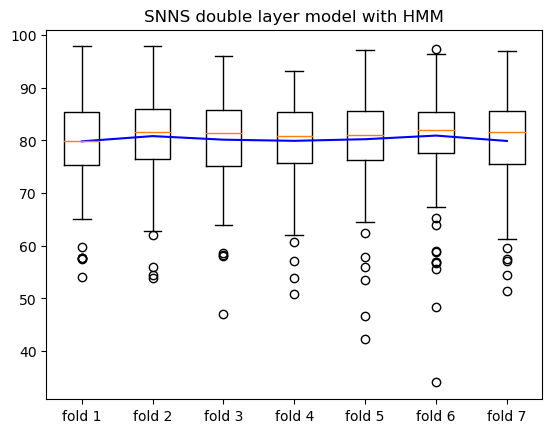

In [245]:
title='SNNS full model with HMM'
hmm2 = [df.hmm for df in df1]
fig,ax=plt.subplots()
labels=['fold %d' % i for i in range(1,8)]
silent=ax.boxplot(hmm2, labels=labels)
means=[col.mean() for col in hmm2]
silent=ax.plot(list(range(1,8)),means,'b-')
silent=ax.set_title(title)

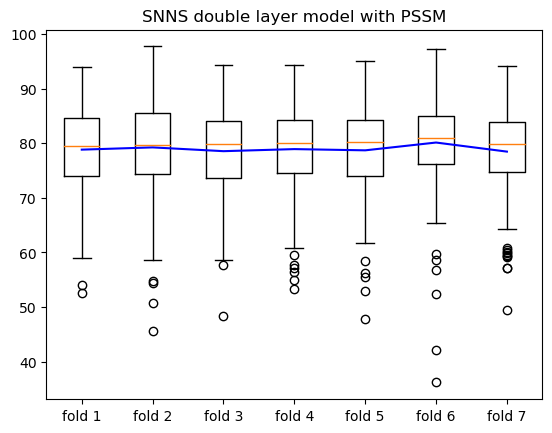

In [247]:
title='SNNS full model with PSSM'
pssma = [df.pssma for df in df1]
fig,ax=plt.subplots()
labels=['fold %d' % i for i in range(1,8)]
silent=ax.boxplot(pssma, labels=labels)
means=[col.mean() for col in pssma]
silent=ax.plot(list(range(1,8)),means,'b-')
silent=ax.set_title(title)

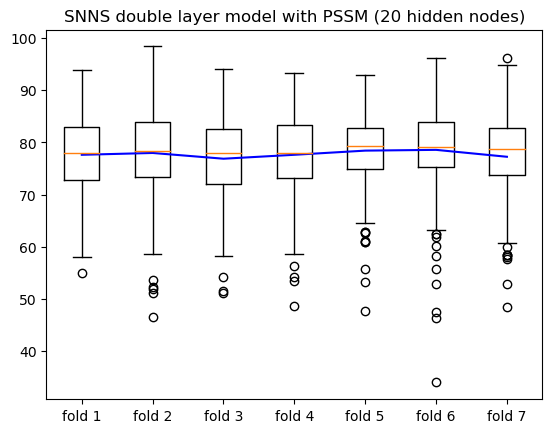

In [246]:
title='SNNS full model with PSSM (20 hidden nodes)'
pssmb = [df.pssmb for df in df1]
fig,ax=plt.subplots()
labels=['fold %d' % i for i in range(1,8)]
silent=ax.boxplot(pssmb, labels=labels)
means=[col.mean() for col in pssmb]
silent=ax.plot(list(range(1,8)),means,'b-')
silent=ax.set_title(title)

## Plot keras and SNNS training together for comparison

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# read in keras training data
hmm_keras_dir='/cluster/gjb_lab/2472402/outputs/keras_train_CV_old/hmm_cross_val/Q3/layer2/'
pssm_keras_dir='/cluster/gjb_lab/2472402/outputs/keras_train_CV_old/pssm_cross_val/Q3/layer2/'
hmm_keras_raw=[pd.read_csv(os.path.join(hmm_keras_dir,f)) for f in os.listdir(hmm_keras_dir)]
pssm_keras_raw=[pd.read_csv(os.path.join(pssm_keras_dir,f)) for f in os.listdir(pssm_keras_dir)]
# only want Q3_accuracy column
hmm_keras=[df.Q3_accuracy for df in hmm_keras_raw]
pssm_keras=[df.Q3_accuracy for df in pssm_keras_raw]
# multiple by 100
hmm_keras=[a*100 for a in hmm_keras]
pssm_keras=[a*100 for a in pssm_keras]

# read in snns training data
with open('/cluster/gjb_lab/2472402/data/snns_score_dirs.txt','r') as f:
    paths = [line.strip() for line in f.readlines()]
# for now, use df1
snns_1=[pd.read_csv(p) for p in paths if os.path.basename(p)=='score_valid1.csv']
# df2 = [pd.read_csv(p) for p in paths if os.path.basename(p)=='score_valid2.csv']
hmm_snns=[df.hmm for df in snns_1]
pssm_snns=[df.pssma for df in snns_1] 

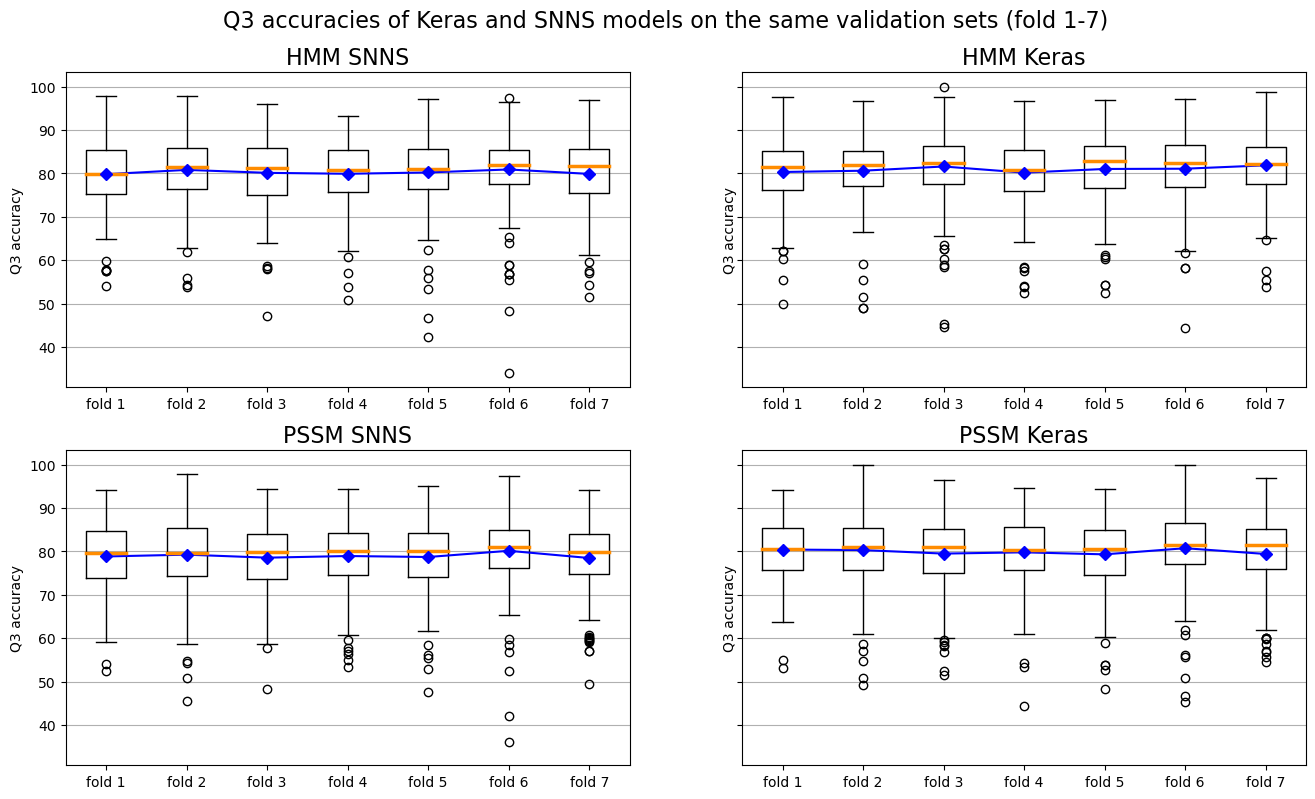

In [94]:
# begin plotting
plt.style.use('default')
fig, [[ax1,ax2],[ax3,ax4]]=plt.subplots(ncols=2,nrows=2, sharey=True, figsize=(16,9))
#title
fig.suptitle('Q3 accuracies of Keras and SNNS models on the same validation sets (fold 1-7)',fontsize=16,y=0.95)
#dictionary to specify how to plot mean in the boxplot function
meanpointprops=dict(marker='D',markerfacecolor='blue',markeredgecolor='blue')
#dictionary to specify how to plot median in the boxplot function
medianlineprops=dict(linestyle='-', linewidth=2.5, color='darkorange')

ys=[hmm_snns,pssm_snns,hmm_keras,pssm_keras]
axs=[ax1,ax3,ax2,ax4] # note order is 1,3,2,4
titles=['HMM SNNS',
        'PSSM SNNS',
        'HMM Keras',
        'PSSM Keras']

# plot SNNS results in left hand side, Keras results on right hand side
for (y,ax,title) in zip(ys,axs,titles):
    # box and whisker plot
    _=ax.boxplot(y, 
                 labels=['fold %d' % d for d in range(1,8)],
                 medianprops=medianlineprops,
                 showmeans=True,
                 meanprops=meanpointprops)
    # plot the mean line
    _=ax.plot(range(1,8),
              [x.mean() for x in y],
              'b-')
    ax.set_title(title,fontsize=16)
    ax.set_ylabel('Q3 accuracy')
    ax.grid(axis='y')

### Plotting SNNS HMM and PSSM accuracies against one another

In [140]:
for i in range(0,7):
    print("Number of domins in SNNS cross-val fold %d: %d" % (i+1 ,hmm_snns[i].shape[0]))
    print("Number of domins in Keras cross-val fold %d: %d" % (i+1, hmm_keras[i].shape[0]))
    print()

Number of domins in SNNS cross-val fold 1: 192
Number of domins in Keras cross-val fold 1: 192

Number of domins in SNNS cross-val fold 2: 192
Number of domins in Keras cross-val fold 2: 192

Number of domins in SNNS cross-val fold 3: 192
Number of domins in Keras cross-val fold 3: 192

Number of domins in SNNS cross-val fold 4: 192
Number of domins in Keras cross-val fold 4: 192

Number of domins in SNNS cross-val fold 5: 192
Number of domins in Keras cross-val fold 5: 191

Number of domins in SNNS cross-val fold 6: 192
Number of domins in Keras cross-val fold 6: 192

Number of domins in SNNS cross-val fold 7: 191
Number of domins in Keras cross-val fold 7: 192



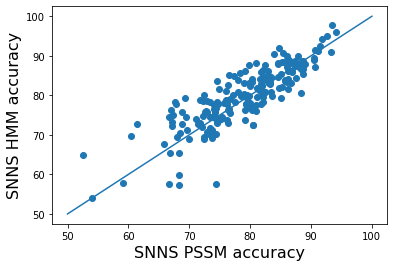

In [143]:
for i in range(0,1): # 1 to 7
    x=pssm_snns[i]
    y=hmm_snns[i]
    plt.scatter(x=x,y=y)
    plt.xlabel('SNNS PSSM accuracy', {'fontsize':16})
    plt.ylabel('SNNS HMM accuracy', {'fontsize':16})
    plt.plot([50,100],[50,100])
    plt.show()

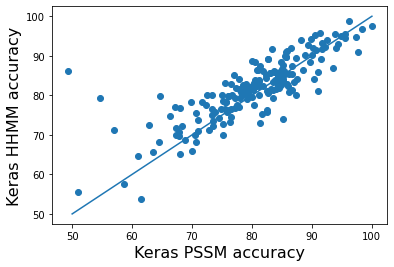

In [171]:
i,j=1,6
# i,j=0,3 
# i,j=1,6
# i,j=2,1
# i,j=3,5
# i,j=4,0
# i,j=5,2
# i,j=6,4
x=pssm_keras[i]
y=hmm_keras[j]
plt.scatter(x=x,y=y)
plt.xlabel('Keras PSSM accuracy', {'fontsize':16})
plt.ylabel('Keras HHMM accuracy', {'fontsize':16})
plt.plot([50,100],[50,100])
plt.show()

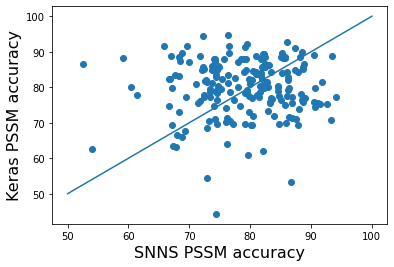

In [142]:
for i in range(0,1): # 1 to 7
    x=pssm_snns[i]
    y=pssm_keras[(i+3)%7]
    plt.scatter(x=x,y=y)
    plt.xlabel('SNNS PSSM accuracy', {'fontsize':16})
    plt.ylabel('Keras PSSM accuracy', {'fontsize':16})
    plt.plot([50,100],[50,100])
    plt.show()

# Training on correct train-test split

This is a repeat of earlier experiments

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

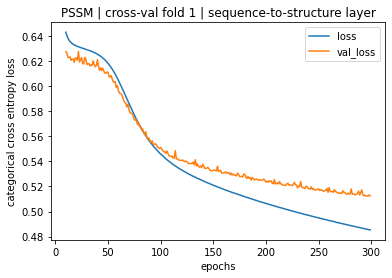

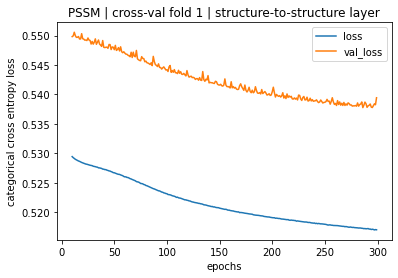

In [85]:
data_type='PSSM'

for i in range(1,2):    
    start=10
    end=300
    results_path = '/cluster/gjb_lab/2472402/outputs/keras_train_CV/%s/cv%d/results.pkl'%(data_type,i)
    (dict1,dict2,_, _) = pickle.load(open(results_path, 'rb'))
    df1 = pd.DataFrame(dict1)
    df2 = pd.DataFrame(dict2)    
    
    x = df1.loc[start:end,['loss','val_loss']]
    plt.plot(x,label=['loss','val_loss'])
    plt.title('%s | cross-val fold %d | sequence-to-structure layer' % (data_type,i))
    plt.xlabel('epochs')
    plt.ylabel('categorical cross entropy loss')
    plt.legend(x)
    plt.show()
    
    x = df2.loc[start:end,['loss','val_loss']]
    plt.plot(x,label=['loss','val_loss'])
    plt.title('%s | cross-val fold %d | structure-to-structure layer' % (data_type,i))
    plt.xlabel('epochs')
    plt.ylabel('categorical cross entropy loss')
    plt.legend(x)
    plt.show()

### See both HMM and PSSM for a particular fold

Showing HMM and PSSM training and validation losses for cross-validation fold 6


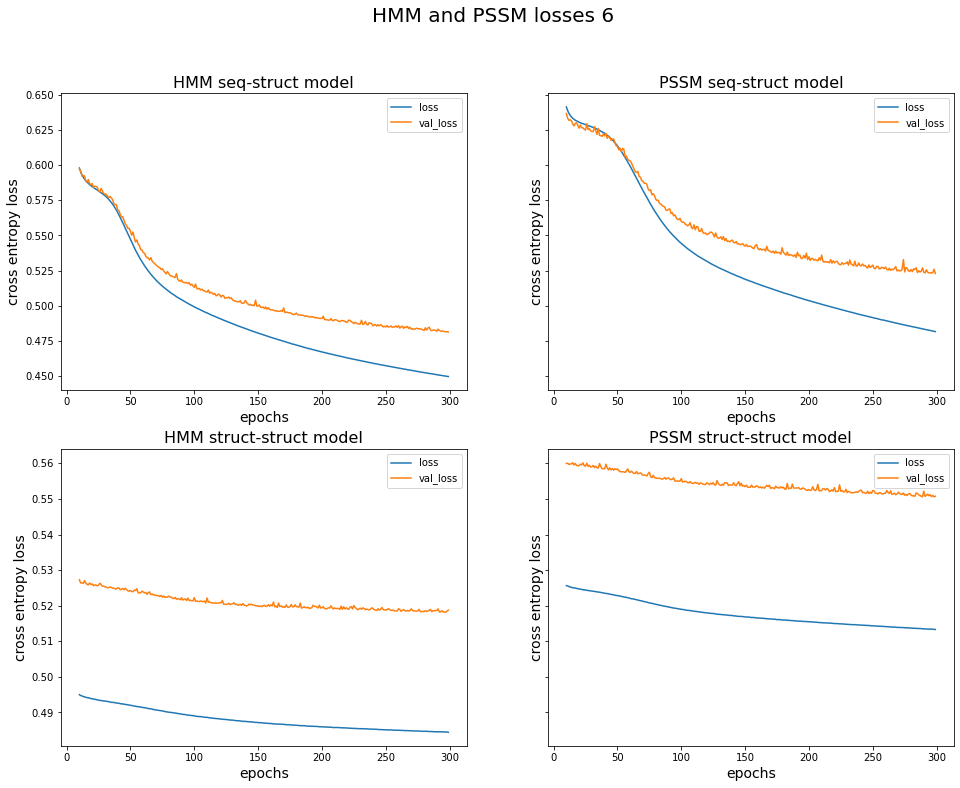

In [167]:
i=6
# specify i. ranges from 1 to 7 inclusive
start=10
end=300
hmm_results_path = '/cluster/gjb_lab/2472402/outputs/keras_train_CV/HMM/cv%d/results.pkl' % i
pssm_results_path = '/cluster/gjb_lab/2472402/outputs/keras_train_CV/PSSM/cv%d/results.pkl' % i
(hmmdict1,hmmdict2,_, _) = pickle.load(open(hmm_results_path, 'rb'))
(pssmdict1,pssmdict2,_, _) = pickle.load(open(pssm_results_path, 'rb'))
hmm1 = pd.DataFrame(hmmdict1)
hmm2 = pd.DataFrame(hmmdict2)
pssm1 = pd.DataFrame(pssmdict1)
pssm2 = pd.DataFrame(pssmdict2)

print("Showing HMM and PSSM training and validation losses for cross-validation fold %s" % i, file=sys.stderr)
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2,figsize=(16,12),sharey='row')
fig.suptitle("HMM and PSSM losses %d" % i, fontsize=20)

for i in range(0,4):
    ax=[ax1,ax3,ax2,ax4][i]
    title=['HMM seq-struct model','HMM struct-struct model','PSSM seq-struct model','PSSM struct-struct model'][i]
    data=[hmm1,hmm2,pssm1,pssm2][i]
    _=ax.plot(data.loc[start:end,['loss','val_loss']])
    _=ax.legend(['loss','val_loss'])
    _=ax.set_ylabel('cross entropy loss',{'fontsize':14})
    _=ax.set_xlabel('epochs',{'fontsize':14})
    _=ax.set_title(title,{'fontsize':16})

# Calculating mean and std deviation of accuracies 

In [1]:
import pandas as pd

In [2]:
outfile='/cluster/gjb_lab/2472402/results/20Aug_CV_summary.csv'

with open(outfile, 'w+') as f:
    # write header
    f.write('fold,SNNS_HMM_acc,Keras_HMM_acc,SNNS_PSSM_acc,Keras_PSSM_acc,SNNS_HMM_sov,Keras_HMM_sov,SNNS_PSSM_sov,Keras_PSSM_sov\n')
    for i in range(1,8):
        keras_path="/cluster/gjb_lab/2472402/results/keras/20Aug/cv%d_scores.csv" % i
        snns_path="/cluster/gjb_lab/2472402/results/snns/20Aug/cv%d_scores.csv" % i
        snns=pd.read_csv(snns_path).set_index('scopeID')
        keras=pd.read_csv(keras_path).set_index('scopeID')
        f.write("%d," % i)
        f.write("%.2f ± %.2f" % (snns.HMM_acc.mean(),snns.HMM_acc.std()) + ',')
        f.write("%.2f ± %.2f" % (keras.HMM_acc.mean(),keras.HMM_acc.std()) + ',')
        f.write("%.2f ± %.2f" % (snns.PSSM_acc.mean(),snns.PSSM_acc.std()) + ',')
        f.write("%.2f ± %.2f" % (keras.PSSM_acc.mean(),keras.PSSM_acc.std()) + ',')
        f.write("%.2f ± %.2f" % (snns.HMM_sov.mean(),snns.HMM_sov.std()) + ',')
        f.write("%.2f ± %.2f" % (keras.HMM_sov.mean(),keras.HMM_sov.std()) + ',')
        f.write("%.2f ± %.2f" % (snns.PSSM_sov.mean(),snns.PSSM_sov.std()) + ',')
        f.write("%.2f ± %.2f" % (keras.PSSM_sov.mean(),keras.PSSM_sov.std()) + '\n')

# Visualizing accuracies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

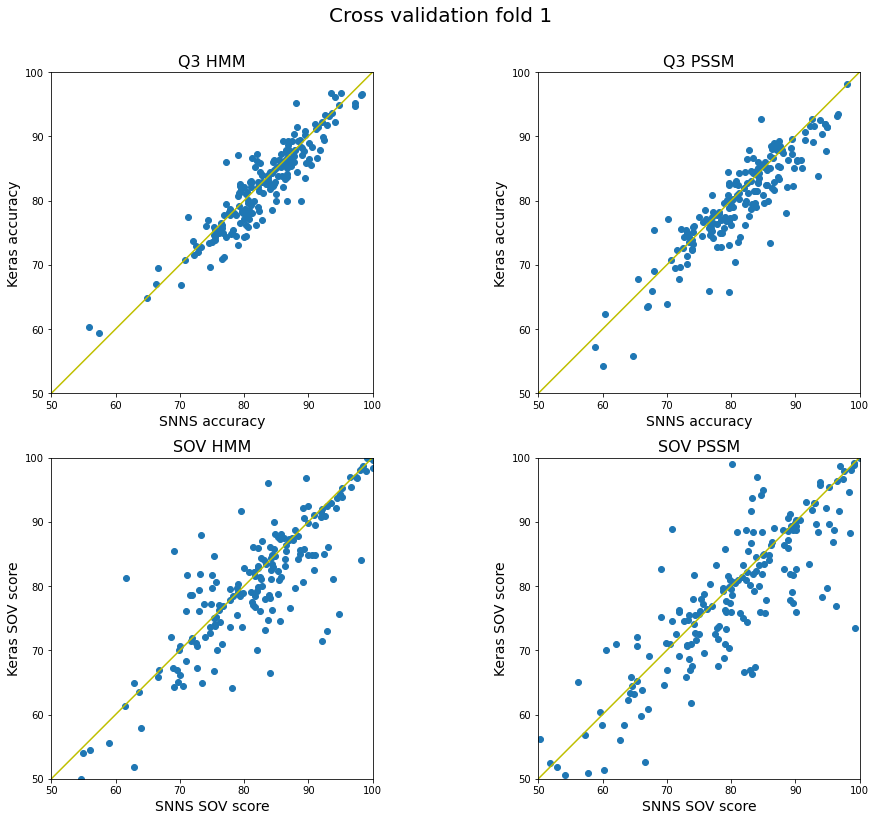

In [12]:
# for i in range(1,8):
for i in [1]:
    
    keras_path="/cluster/gjb_lab/2472402/results/keras/cv%d_scores.csv" % i
    snns_path="/cluster/gjb_lab/2472402/results/snns/cv%d_scores.csv" % i
    snns=pd.read_csv(snns_path).set_index('scopeID')
    keras=pd.read_csv(keras_path).set_index('scopeID')
    
    fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(ncols=2,nrows=2,figsize=(16,13))
    fig.suptitle("Cross validation fold %d" % i, fontsize=20, y=0.95)
    titles=['Q3 HMM','Q3 PSSM','SOV HMM','SOV PSSM']
    xlabels=['SNNS accuracy','SNNS accuracy','SNNS SOV score','SNNS SOV score']
    ylabels=['Keras accuracy','Keras accuracy','Keras SOV score','Keras SOV score']
    axs=[ax1,ax2,ax3,ax4]
    xs=[snns.HMM_acc, snns.PSSM_acc, snns.HMM_sov, snns.PSSM_sov]
    ys=[keras.HMM_acc, keras.PSSM_acc, keras.HMM_sov, keras.PSSM_sov]

    for j in range(0,4):
        ax=axs[j]
        title=titles[j]
        x=xs[j]
        y=ys[j]
        xlabel=xlabels[j]
        ylabel=ylabels[j]
        ax.set_aspect(aspect='equal')
        ax.scatter(x=x,y=y)
        ax.set_title(title,{'fontsize':16})
        ax.set_xlabel(xlabel,{'fontsize':14})
        ax.set_ylabel(ylabel,{'fontsize':14})
        ax.plot([0,100],[0,100],'y-')
        ax.set_xlim(50,100)
        ax.set_ylim(50,100)

## Histogram

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

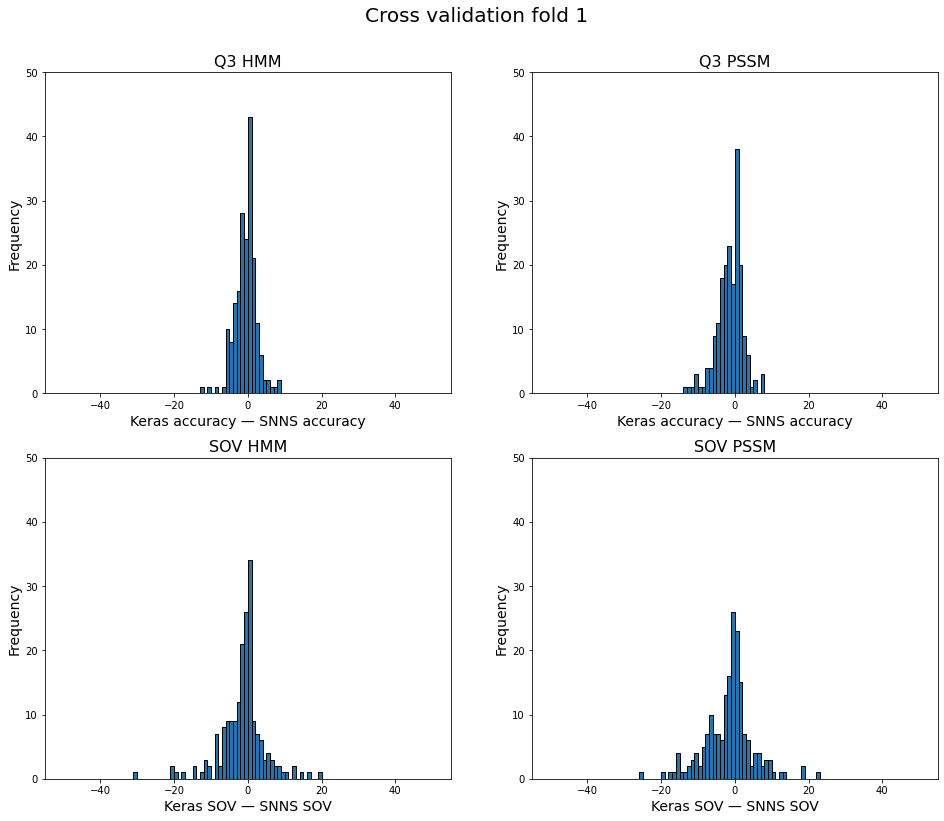

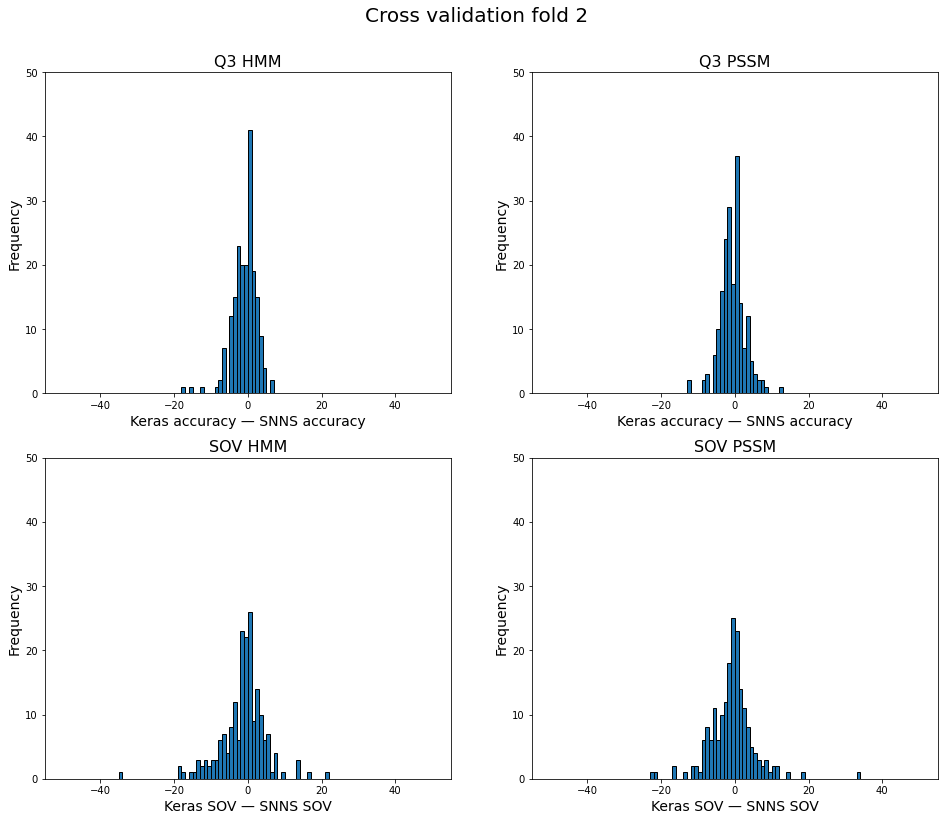

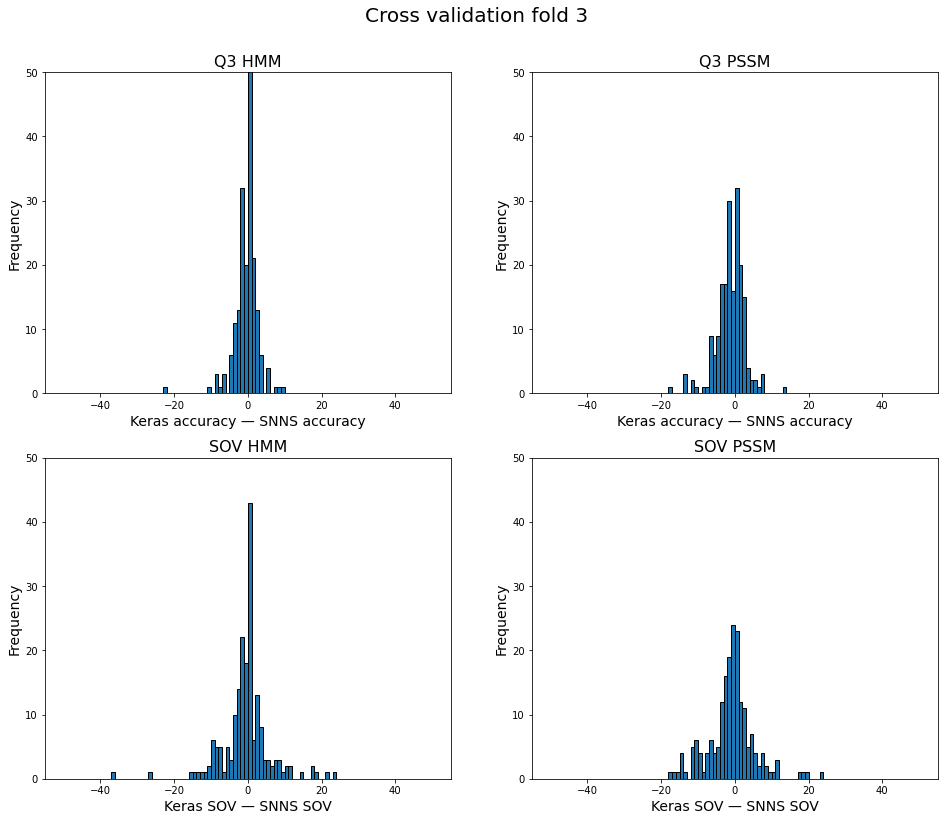

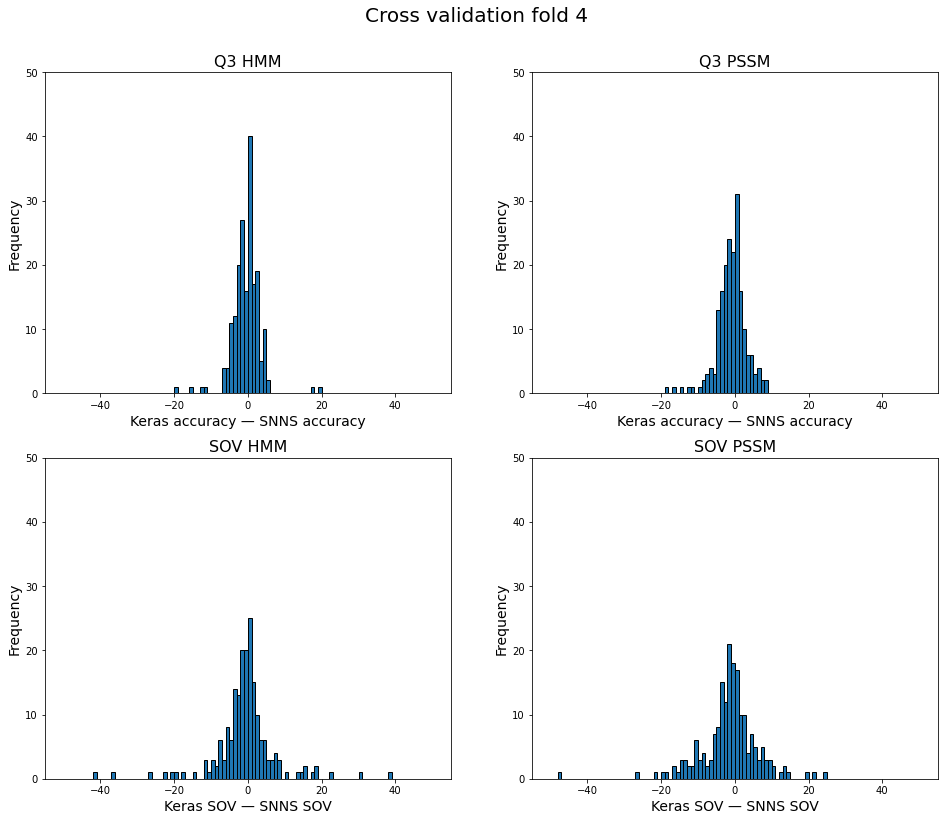

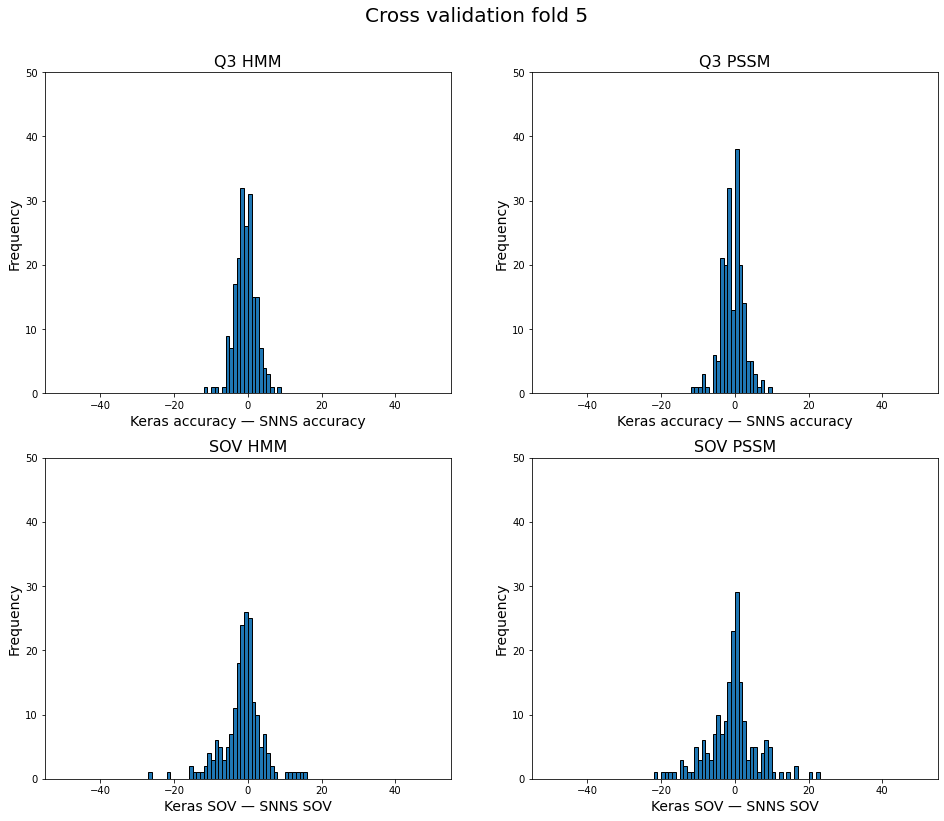

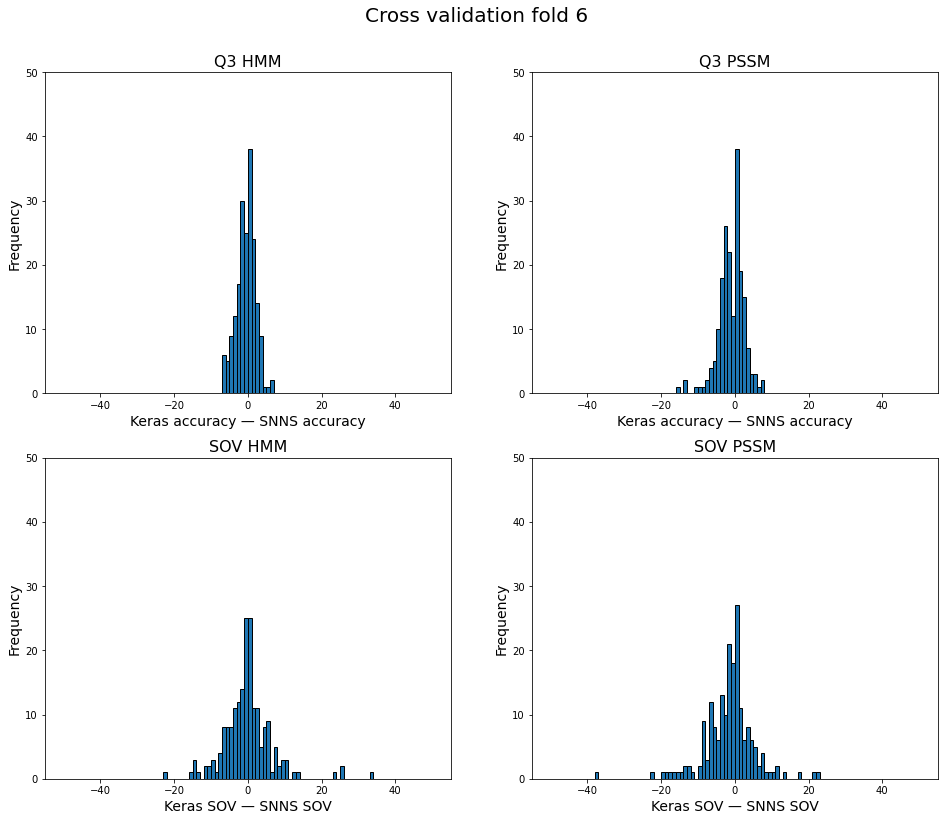

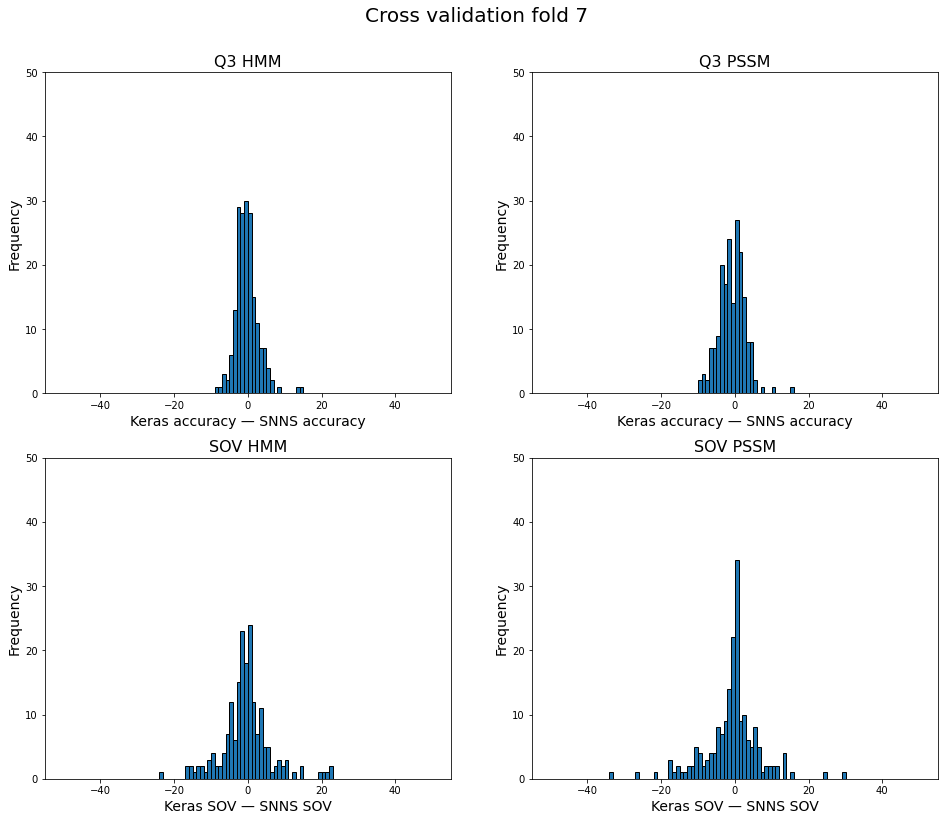

In [18]:
for i in range(1,8):
    
    keras_path="/cluster/gjb_lab/2472402/results/keras/cv%d_scores.csv" % i
    snns_path="/cluster/gjb_lab/2472402/results/snns/cv%d_scores.csv" % i
    snns=pd.read_csv(snns_path).set_index('scopeID')
    keras=pd.read_csv(keras_path).set_index('scopeID')
    
    fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(ncols=2,nrows=2,figsize=(16,13))
    fig.suptitle("Cross validation fold %d" % i, fontsize=20, y=0.95)
    titles=['Q3 HMM','Q3 PSSM','SOV HMM','SOV PSSM']
    xlabels=['Keras accuracy — SNNS accuracy','Keras accuracy — SNNS accuracy','Keras SOV — SNNS SOV','Keras SOV — SNNS SOV']
    axs=[ax1,ax2,ax3,ax4]
    xs=[snns.HMM_acc, snns.PSSM_acc, snns.HMM_sov, snns.PSSM_sov]
    ys=[keras.HMM_acc, keras.PSSM_acc, keras.HMM_sov, keras.PSSM_sov]

    for j in range(0,4):
        ax=axs[j]
        title=titles[j]
        data=ys[j]-xs[j]
        xlabel=xlabels[j]
        ylabel='Frequency'
        ax.set_title(title,{'fontsize':16})
        ax.set_xlabel(xlabel,{'fontsize':14})
        ax.set_ylabel(ylabel,{'fontsize':14})
        ax.set_ylim(0,50)
        ax.hist(data,bins=100, range=(-50,50),linewidth=1,edgecolor='black') # exclude outliers + centre axis around 0

## 2d histogram

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

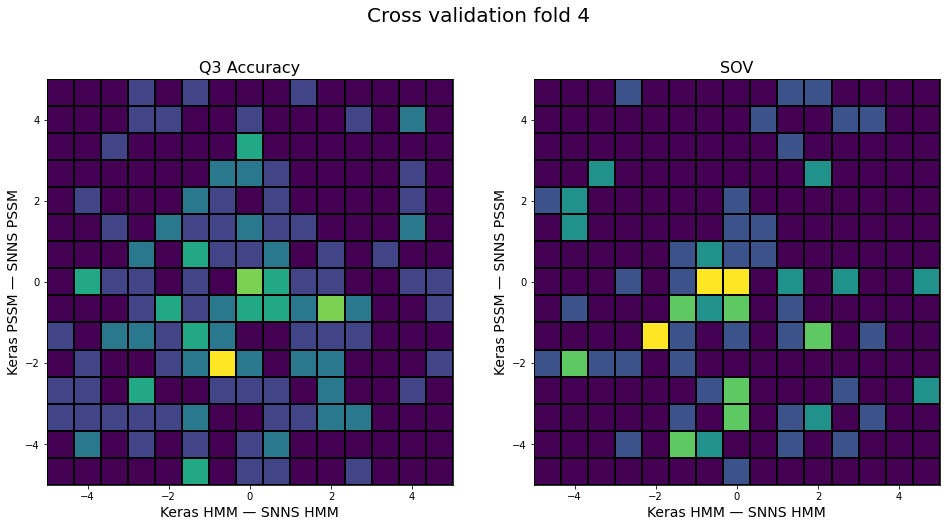

In [3]:
# for i in range(1,8):
for i in [4]:
    
    keras_path="/cluster/gjb_lab/2472402/results/keras/cv%d_scores.csv" % i
    snns_path="/cluster/gjb_lab/2472402/results/snns/cv%d_scores.csv" % i
    snns=pd.read_csv(snns_path).set_index('scopeID')
    keras=pd.read_csv(keras_path).set_index('scopeID')
    
    fig,[ax1,ax2]=plt.subplots(ncols=2,nrows=1,figsize=(16,8))
    fig.suptitle("Cross validation fold %d" % i, fontsize=20, y=0.98)

    titles=['Q3 Accuracy','SOV']
    axs=[ax1,ax2]
    xs=[keras.HMM_acc-snns.HMM_acc,keras.HMM_sov-snns.HMM_sov]
    ys=[keras.PSSM_acc-snns.PSSM_acc,keras.PSSM_sov-snns.PSSM_sov]
    xlabel='Keras HMM — SNNS HMM'
    ylabel='Keras PSSM — SNNS PSSM'

    for j in range(0,2):
        ax=axs[j]
        title=titles[j]
        x=xs[j]
        y=ys[j]
        ax.set_title(title,{'fontsize':16})
        ax.set_xlabel(xlabel,{'fontsize':14})
        ax.set_ylabel(ylabel,{'fontsize':14})
        ax.set_aspect(aspect='equal')
        ax.hist2d(x,y,bins=15, range=[[-5,5], [-5,5]], cmap="viridis", linewidths=1, edgecolors='black', linestyles='-')
    